In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

##### Loading the Dataset

In [3]:
club_loan_data=pd.read_excel('D:\Data Science\Data Mining\Project\LendingClubLoans2018-2020.xlsx')
club_loan_data.head()

,id,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,deferral_term,hardship_amount,hardship_payoff_balance_amount,hardship_last_payment_amount,orig_projected_additional_accrued_interest
0,113924213,Stagehand,Individual,RENT,Fully Paid,35000,0.1505,36 months,1214.15,C,...,80.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,113101099,Detention Deputy,Individual,RENT,Charged Off,21000,0.1408,60 months,489.51,C,...,100.0,33.3,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,113672609,NaN,Individual,MORTGAGE,Current,20000,0.1408,60 months,466.20,C,...,100.0,18.2,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,115053799,Driver,Individual,RENT,Fully Paid,16000,0.1903,36 months,586.74,D,...,95.7,75.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,6317122,JP Morgan Chase,Individual,MORTGAGE,Fully Paid,24000,0.0890,60 months,497.04,A,...,100.0,0.0,0,0,NaN,3.0,38.81,5283.25,42.29,116.43


##### Data Exploration

In [4]:
print(club_loan_data.shape)
club_loan_data.info(verbose=True)

(77159, 108)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Data columns (total 108 columns):
 #   Column                                      Dtype         
---  ------                                      -----         
 0   id                                          int64         
 1   emp_title                                   object        
 2   application_type                            object        
 3   home_ownership                              object        
 4   loan_status                                 object        
 5   loan_amnt                                   int64         
 6   int_rate                                    float64       
 7   term                                        object        
 8   installment                                 float64       
 9   grade                                       object        
 10  earliest_cr_line                            datetime64[ns]
 11  issue_d                                 

In [5]:
club_loan_data.describe()

,id,loan_amnt,int_rate,installment,annual_inc,annual_inc_joint,dti,dti_joint,delinq_2yrs,inq_fi,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,deferral_term,hardship_amount,hardship_payoff_balance_amount,hardship_last_payment_amount,orig_projected_additional_accrued_interest
count,7.715900e+04,77159.000000,77159.000000,77159.000000,7.715900e+04,9.382000e+03,77051.000000,9382.000000,77159.000000,74664.000000,...,77154.000000,76040.000000,77159.000000,77159.000000,9382.000000,4491.000000,6117.000000,6117.000000,6117.000000,5989.000000
mean,1.152632e+08,15156.519978,0.131401,443.024291,7.836316e+04,1.200300e+05,19.690700,19.616616,0.321012,0.967709,...,93.762679,38.434283,0.127866,0.038829,32400.147197,2.272545,157.217314,6925.184353,694.179147,223.813354
std,2.033129e+07,9749.195616,0.051024,279.917146,8.492549e+04,6.042086e+04,21.589715,7.643524,0.932101,1.431024,...,9.761986,36.271699,0.346214,0.352836,26588.310055,0.583821,277.110950,7026.968193,1568.831655,332.369244
min,1.227221e+06,1000.000000,0.053200,7.610000,0.000000e+00,1.580100e+04,0.000000,0.000000,0.000000,0.000000,...,7.900000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.010000,0.000000
25%,1.141658e+08,7800.000000,0.099300,239.520000,4.500000e+04,8.300000e+04,11.960000,14.030000,0.000000,0.000000,...,90.900000,0.000000,0.000000,0.000000,14580.750000,2.000000,0.000000,1325.240000,242.930000,27.400000
50%,1.178768e+08,12175.000000,0.126200,368.900000,6.500000e+04,1.091670e+05,18.080000,19.300000,0.000000,0.000000,...,100.000000,33.300000,0.000000,0.000000,25756.000000,2.000000,0.000000,4178.300000,400.000000,97.771770
75%,1.248023e+08,20000.000000,0.160200,591.285000,9.400000e+04,1.430000e+05,25.010000,24.917500,0.000000,1.000000,...,100.000000,66.700000,0.000000,0.000000,42373.000000,2.000000,243.290000,10983.820000,670.230000,304.688880
max,1.264174e+08,40000.000000,0.309900,1717.630000,1.099920e+07,1.058000e+06,999.000000,39.970000,36.000000,21.000000,...,100.000000,100.000000,6.000000,44.000000,357135.000000,4.000000,1793.180000,40306.410000,25970.000000,5321.560000


In [6]:
club_loan_data.dtypes

id                                              int64
emp_title                                      object
application_type                               object
home_ownership                                 object
loan_status                                    object
                                               ...   
deferral_term                                 float64
hardship_amount                               float64
hardship_payoff_balance_amount                float64
hardship_last_payment_amount                  float64
orig_projected_additional_accrued_interest    float64
Length: 108, dtype: object

##### Defining Date, categorical and Numerical columns

##### Columns with Dates

In [7]:
date_cols=club_loan_data.select_dtypes(include=['datetime64[ns]']).columns
date_cols

Index(['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'next_pymnt_d',
       'payment_plan_start_date'],
      dtype='object')

`Missing and Unique Value Check in Date columns`

In [8]:
def missing_check_date(i,data):
    print(data[i].isna().sum())
for i in date_cols:
    missing_check_date(i,club_loan_data)

0
0
0
43903
72668


In [9]:
club_loan_data.loc[:,['earliest_cr_line','issue_d','last_pymnt_d','next_pymnt_d',]].head()

,earliest_cr_line,issue_d,last_pymnt_d,next_pymnt_d
0,2001-01-01,2017-08-01,2020-04-01,NaT
1,2000-12-01,2017-07-01,2019-06-01,NaT
2,1986-04-01,2017-07-01,2020-05-01,2020-06-01
3,1990-02-01,2017-08-01,2019-10-01,NaT
4,1988-03-01,2013-08-01,2019-01-01,NaT


In [10]:
club_loan_data[date_cols].dtypes

earliest_cr_line           datetime64[ns]
issue_d                    datetime64[ns]
last_pymnt_d               datetime64[ns]
next_pymnt_d               datetime64[ns]
payment_plan_start_date    datetime64[ns]
dtype: object

###### Categorical Columns

In [11]:
cat_cols=club_loan_data.select_dtypes(include='object').columns
print(len(cat_cols))

15


In [12]:
def missing_check_cat(i,data):
    print(data[i].isna().sum())
for i in cat_cols:
    missing_check_cat(i,club_loan_data)

5862
0
0
0
0
0
0
67780
0
0
1627
72668
72668
72668
0


In [13]:
cat_cols

Index(['emp_title', 'application_type', 'home_ownership', 'loan_status',
       'term', 'grade', 'verification_status', 'verification_status_joint',
       'pymnt_plan', 'purpose', 'hardship_flag', 'hardship_reason',
       'hardship_type', 'hardship_status', 'initial_list_status'],
      dtype='object')

In [14]:
def unique_value_counts_cat(i,data):
    print(data[i].value_counts())
    print('_______________')
for i in cat_cols:
    unique_value_counts_cat(i,club_loan_data)

Teacher                         1658
Manager                         1436
Owner                           1148
Supervisor                       694
Driver                           666
                                ... 
Special Process Technician         1
Inspection support agent           1
Wind turbine technician            1
Maintenance & waiter-2nd job       1
Legal Administrator                1
Name: emp_title, Length: 28185, dtype: int64
_______________
Individual    67777
Joint App      9382
Name: application_type, dtype: int64
_______________
MORTGAGE    37334
RENT        30749
OWN          9074
ANY             1
NONE            1
Name: home_ownership, dtype: int64
_______________
Fully Paid            34289
Current               32039
Charged Off            9614
Late (31-120 days)      659
In Grace Period         448
Late (16-30 days)        96
Default                  14
Name: loan_status, dtype: int64
_______________
36 months    52800
60 months    24359
Name: term, dtyp

Here `emp_title` has so many unique values and `pymnt_plan` has only one .So they can be considered as Un-necessary columns and can be dropped in a Cleaning Stage

##### Numerical Columns

In [15]:
num_cols=club_loan_data.select_dtypes(exclude=['object','datetime64[ns]']).columns
print(len(num_cols))

88


In [16]:
def missing_check_num(i,data):
    print(data[i].isna().sum())
for i in num_cols:
    missing_check_num(i,club_loan_data)

0
0
0
0
0
67777
108
67777
0
2495
2495
0
0
0
0
0
0
0
2495
0
0
0
0
0
0
0
0
0
0
2495
0
0
2495
0
0
0
0
0
65802
57285
1047
59765
9243
4879
39645
51792
2437
0
0
0
2495
2495
2495
13262
1154
2511
103
2495
2495
2495
7
1116
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
1119
0
0
67777
72668
71042
71042
71042
71170


In [17]:
def unique_value_counts_num(i,data):
    print(len(data[i].value_counts()))
    print('*****')
for i in num_cols:
    unique_value_counts_num(i,club_loan_data)

77159
*****
1439
*****
129
*****
10999
*****
6850
*****
2234
*****
5506
*****
3013
*****
26
*****
21
*****
29
*****
7
*****
38
*****
38
*****
72
*****
71
*****
20
*****
60
*****
11
*****
35
*****
14
*****
101
*****
23219
*****
23642
*****
67605
*****
67300
*****
33349
*****
67295
*****
1988
*****
36
*****
3238
*****
65932
*****
45617
*****
4033
*****
62193
*****
55028
*****
2596
*****
46393
*****
122
*****
136
*****
338
*****
131
*****
25
*****
254
*****
123
*****
137
*****
434
*****
657
*****
206
*****
141
*****
38
*****
7
*****
16
*****
193
*****
1117
*****
154
*****
1074
*****
20
*****
33
*****
17054
*****
31197
*****
29322
*****
5971
*****
6
*****
6049
*****
6
*****
33
*****
28
*****
38
*****
39
*****
51
*****
77
*****
54
*****
77
*****
35
*****
60
*****
25
*****
22
*****
459
*****
145
*****
7
*****
15
*****
8706
*****
3
*****
1445
*****
5481
*****
3363
*****
4911
*****


In [18]:
club_loan_data['loan_status'].value_counts()

Fully Paid            34289
Current               32039
Charged Off            9614
Late (31-120 days)      659
In Grace Period         448
Late (16-30 days)        96
Default                  14
Name: loan_status, dtype: int64

###### Initial Statistics of Columns    
    Total Columns=108
    Numerical=88
    Date=5
    Categorical=15

#### Visualisation of Dataset to get insights into data

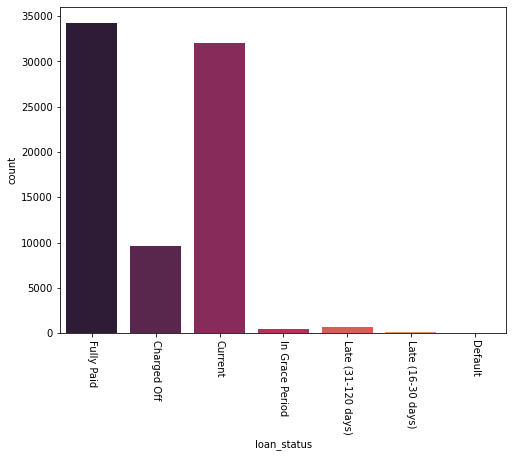

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x=club_loan_data['loan_status'],palette='rocket')
plt.xticks(rotation=270);
plt.savefig('Fig_1.png',bbox_inches='tight')

### Cleaning Stage

As Missing Values has a blank space in the dataset. So I am replacing it with `nan`

In [20]:
from numpy import nan
club_loan_data = club_loan_data.replace('', nan)

In [21]:
missing_values=club_loan_data.isna().sum()
Missing_df=missing_values.to_frame('Missing_Values')
Missing_df

,Missing_Values
id,0
emp_title,5862
application_type,0
home_ownership,0
loan_status,0
...,...
deferral_term,72668
hardship_amount,71042
hardship_payoff_balance_amount,71042
hardship_last_payment_amount,71042


In [22]:
percentage=(club_loan_data.isna().sum()*100)/len(club_loan_data)
percentage=percentage.to_frame('Missing Percentage')
percentage

,Missing Percentage
id,0.000000
emp_title,7.597299
application_type,0.000000
home_ownership,0.000000
loan_status,0.000000
...,...
deferral_term,94.179551
hardship_amount,92.072215
hardship_payoff_balance_amount,92.072215
hardship_last_payment_amount,92.072215


In [23]:
Missing_values=pd.concat([Missing_df,percentage],axis=1)
Missing_values

,Missing_Values,Missing Percentage
id,0,0.000000
emp_title,5862,7.597299
application_type,0,0.000000
home_ownership,0,0.000000
loan_status,0,0.000000
...,...,...
deferral_term,72668,94.179551
hardship_amount,71042,92.072215
hardship_payoff_balance_amount,71042,92.072215
hardship_last_payment_amount,71042,92.072215


In [24]:
great_60=Missing_values[Missing_values['Missing Percentage']>=60]
great_60

,Missing_Values,Missing Percentage
annual_inc_joint,67777,87.840693
verification_status_joint,67780,87.844581
hardship_reason,72668,94.179551
hardship_type,72668,94.179551
hardship_status,72668,94.179551
payment_plan_start_date,72668,94.179551
dti_joint,67777,87.840693
mths_since_last_record,65802,85.281043
mths_since_last_major_derog,57285,74.242797
mths_since_recent_bc_dlq,59765,77.456940


In [25]:
Droping_columns=[]

In [26]:
for index,rows in great_60.iterrows():
    Droping_columns.append(index)

In [27]:
Droping_columns

['annual_inc_joint',
 'verification_status_joint',
 'hardship_reason',
 'hardship_type',
 'hardship_status',
 'payment_plan_start_date',
 'dti_joint',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint',
 'deferral_term',
 'hardship_amount',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'orig_projected_additional_accrued_interest']

In [28]:
len(Droping_columns)

17

In [29]:
club_loan_data.drop(Droping_columns,axis=1,inplace=True)

In [30]:
date_cols=club_loan_data.select_dtypes(include=['datetime64[ns]']).columns
cat_cols=club_loan_data.select_dtypes(include='object').columns
num_cols=club_loan_data.select_dtypes(exclude=['object','datetime64[ns]']).columns

In [31]:
print(len(date_cols))
print(len(num_cols))
print(len(cat_cols))

4
76
11


In [32]:
print(cat_cols)

Index(['emp_title', 'application_type', 'home_ownership', 'loan_status',
       'term', 'grade', 'verification_status', 'pymnt_plan', 'purpose',
       'hardship_flag', 'initial_list_status'],
      dtype='object')


In [33]:
club_loan_data.shape

(77159, 91)

##### Checking Columns with only one unique Values

In [34]:
one_unique=[]
def one_unique_value_check(data,col):
    value=len(data[col].unique())
    if value==1:
        one_unique.append(col)
for col in club_loan_data.columns:
    one_unique_value_check(club_loan_data,col)

In [35]:
one_unique

['pymnt_plan']

In [36]:
cat_cols

Index(['emp_title', 'application_type', 'home_ownership', 'loan_status',
       'term', 'grade', 'verification_status', 'pymnt_plan', 'purpose',
       'hardship_flag', 'initial_list_status'],
      dtype='object')

In [37]:
club_loan_data[cat_cols].head()

,emp_title,application_type,home_ownership,loan_status,term,grade,verification_status,pymnt_plan,purpose,hardship_flag,initial_list_status
0,Stagehand,Individual,RENT,Fully Paid,36 months,C,Verified,n,debt_consolidation,N,w
1,Detention Deputy,Individual,RENT,Charged Off,60 months,C,Not Verified,n,debt_consolidation,N,w
2,NaN,Individual,MORTGAGE,Current,60 months,C,Verified,n,home_improvement,N,w
3,Driver,Individual,RENT,Fully Paid,36 months,D,Source Verified,n,debt_consolidation,N,w
4,JP Morgan Chase,Individual,MORTGAGE,Fully Paid,60 months,A,Verified,n,debt_consolidation,N,w


In [38]:
club_loan_data[num_cols].sample(3)

,id,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
3766,121716946,40000,0.1262,902.37,128604.0,17.39,0,0.0,0.0,0,...,5,8,4,13,0,0,100.0,40.0,0,0
19012,115070157,3600,0.1199,119.56,125000.0,21.23,0,2.0,1.0,0,...,6,14,4,10,0,1,100.0,66.7,0,0
42873,124978892,21000,0.1262,473.74,58350.0,7.67,1,0.0,2.0,2,...,2,3,2,3,1,1,80.0,0.0,0,0


In [39]:
print(len(club_loan_data['id'].unique()))
print(len(club_loan_data['emp_title'].unique()))

77159
28186


As the columns with only one unique value like`pymnt_plan` has 0 variance so it can be removed from the dataset. Also the `emp_title` has `28186` unique and `id` has `77159` unique values which will not support in term of good model building so it can also be removed from the dataset as they are unnecessary columns

###### Going Back to different types of columns to check their values

In [40]:
Un_Necessary_Columns=['id','pymnt_plan','emp_title']

In [41]:
club_loan_data[date_cols]

,earliest_cr_line,issue_d,last_pymnt_d,next_pymnt_d
0,2001-01-01,2017-08-01,2020-04-01,NaT
1,2000-12-01,2017-07-01,2019-06-01,NaT
2,1986-04-01,2017-07-01,2020-05-01,2020-06-01
3,1990-02-01,2017-08-01,2019-10-01,NaT
4,1988-03-01,2013-08-01,2019-01-01,NaT
...,...,...,...,...
77154,1995-03-01,2017-09-01,2020-05-01,2020-06-01
77155,2002-12-01,2017-09-01,2020-05-01,2020-06-01
77156,1999-08-01,2017-12-01,2018-05-01,NaT
77157,2007-01-01,2017-08-01,2018-06-01,NaT


By analyzing the dataset my hypothesis is that the `earliest_cr_line` which mean `The month the borrower's earliest reported credit line was opened` is also an unnecessary column.

In [42]:
Un_Necessary_Columns.append('earliest_cr_line')
Un_Necessary_Columns

['id', 'pymnt_plan', 'emp_title', 'earliest_cr_line']

In [43]:
#club_loan_data.drop(['next_pymnt_d'],axis=1,inplace=True)

In [44]:
club_loan_data.drop(Un_Necessary_Columns,axis=1,inplace=True)

In [45]:
date_cols=club_loan_data.select_dtypes(include=['datetime64[ns]']).columns
cat_cols=club_loan_data.select_dtypes(include='object').columns
num_cols=club_loan_data.select_dtypes(exclude=['object','datetime64[ns]']).columns

In [46]:
club_loan_data[date_cols]

,issue_d,last_pymnt_d,next_pymnt_d
0,2017-08-01,2020-04-01,NaT
1,2017-07-01,2019-06-01,NaT
2,2017-07-01,2020-05-01,2020-06-01
3,2017-08-01,2019-10-01,NaT
4,2013-08-01,2019-01-01,NaT
...,...,...,...
77154,2017-09-01,2020-05-01,2020-06-01
77155,2017-09-01,2020-05-01,2020-06-01
77156,2017-12-01,2018-05-01,NaT
77157,2017-08-01,2018-06-01,NaT


In [47]:
def unique_value_date_cols(i,data):
    print(data[i].value_counts())
    print('_______________')
for i in date_cols:
    unique_value_date_cols(i,club_loan_data)

2017-08-01    17934
2017-12-01    17175
2017-09-01    16811
2017-07-01    15632
2017-11-01     7112
2013-12-01      416
2013-10-01      380
2013-11-01      372
2013-09-01      343
2013-08-01      305
2013-07-01      241
2013-06-01      210
2013-05-01      172
2013-04-01       51
2013-03-01        3
2013-02-01        2
Name: issue_d, dtype: int64
_______________
2020-05-01    32333
2018-08-01     2482
2018-10-01     2369
2018-07-01     2193
2018-09-01     2142
2018-06-01     2140
2018-05-01     2116
2018-11-01     2060
2019-01-01     2008
2019-02-01     1998
2020-04-01     1934
2019-07-01     1867
2018-12-01     1808
2019-05-01     1805
2019-04-01     1792
2019-03-01     1700
2019-08-01     1617
2019-09-01     1572
2020-03-01     1569
2019-10-01     1568
2019-06-01     1515
2019-12-01     1435
2020-01-01     1414
2019-11-01     1325
2020-02-01     1239
2020-06-01      948
2020-07-01      209
2020-08-01        1
Name: last_pymnt_d, dtype: int64
_______________
2020-06-01    29658
2020-07

As years are more important in term of loan dates. So I am extracting now `years` from the date columns. This is some sort of feature engenerring as I am making a new feature from the original one

In [48]:
def dates_tranformation(data,col):
    data[col+'year']=data[col].dt.year
for d in date_cols:
    dates_tranformation(club_loan_data,d)

In [49]:
club_loan_data[date_cols]

,issue_d,last_pymnt_d,next_pymnt_d
0,2017-08-01,2020-04-01,NaT
1,2017-07-01,2019-06-01,NaT
2,2017-07-01,2020-05-01,2020-06-01
3,2017-08-01,2019-10-01,NaT
4,2013-08-01,2019-01-01,NaT
...,...,...,...
77154,2017-09-01,2020-05-01,2020-06-01
77155,2017-09-01,2020-05-01,2020-06-01
77156,2017-12-01,2018-05-01,NaT
77157,2017-08-01,2018-06-01,NaT


In [50]:
club_loan_data.rename(columns={'issue_dyear': 'Issue_Year', 'last_pymnt_dyear': 'last_payment_year','next_pymnt_dyear':'next_payment_year'}, inplace=True)

In [51]:
club_loan_data['next_payment_year'].unique()

array([  nan, 2020.])

In [52]:
(club_loan_data['next_payment_year'].isna().sum()*100)/len(club_loan_data)

56.899389572182116

In [53]:
club_loan_data['next_payment_year'].unique()

array([  nan, 2020.])

Now I am dropping the original `Date Columns` because I have transformed them and extracted year value from them. I will also drop `next_payment_year` from the data set as it has only one unique value and all other are missing values `(56.89%)` which will lead to zero varaince of this column if I impute it with most frequent or on the basis of mean.

In [54]:
date_cols

Index(['issue_d', 'last_pymnt_d', 'next_pymnt_d'], dtype='object')

In [55]:
club_loan_data.drop(date_cols,axis=1,inplace=True)
club_loan_data.drop('next_payment_year',axis=1,inplace=True)

In [56]:
club_loan_data.head()

,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,...,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,Issue_Year,last_payment_year
0,Individual,RENT,Fully Paid,35000,0.1505,36 months,1214.15,C,110000.0,Verified,...,5,7,0,1,80.0,0.0,0,0,2017,2020
1,Individual,RENT,Charged Off,21000,0.1408,60 months,489.51,C,54000.0,Not Verified,...,5,13,0,1,100.0,33.3,1,0,2017,2019
2,Individual,MORTGAGE,Current,20000,0.1408,60 months,466.20,C,74000.0,Verified,...,7,14,0,2,100.0,18.2,0,0,2017,2020
3,Individual,RENT,Fully Paid,16000,0.1903,36 months,586.74,D,58000.0,Source Verified,...,8,10,0,2,95.7,75.0,1,0,2017,2019
4,Individual,MORTGAGE,Fully Paid,24000,0.0890,60 months,497.04,A,94020.0,Verified,...,4,12,0,1,100.0,0.0,0,0,2013,2019


In [57]:
club_loan_data[cat_cols].head()

,application_type,home_ownership,loan_status,term,grade,verification_status,purpose,hardship_flag,initial_list_status
0,Individual,RENT,Fully Paid,36 months,C,Verified,debt_consolidation,N,w
1,Individual,RENT,Charged Off,60 months,C,Not Verified,debt_consolidation,N,w
2,Individual,MORTGAGE,Current,60 months,C,Verified,home_improvement,N,w
3,Individual,RENT,Fully Paid,36 months,D,Source Verified,debt_consolidation,N,w
4,Individual,MORTGAGE,Fully Paid,60 months,A,Verified,debt_consolidation,N,w


In [58]:
club_loan_data.shape

(77159, 86)

Again Check the Different types of Columns by first re-running the cells above

In [59]:
date_cols=club_loan_data.select_dtypes(include=['datetime64[ns]']).columns
cat_cols=club_loan_data.select_dtypes(include='object').columns
num_cols=club_loan_data.select_dtypes(exclude=['object','datetime64[ns]']).columns

In [60]:
print(club_loan_data[num_cols].shape[1])
print(club_loan_data[date_cols].shape[1])
print(club_loan_data[cat_cols].shape[1])

77
0
9


##### Outlier's Detection 

In [61]:
import warnings

warnings.filterwarnings('ignore')

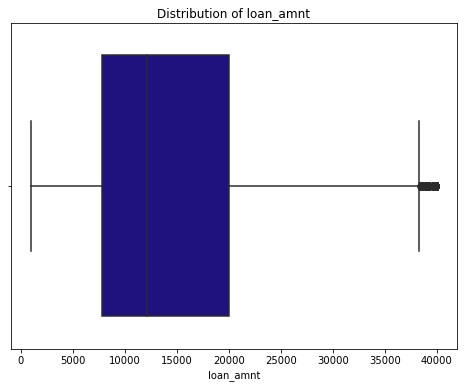

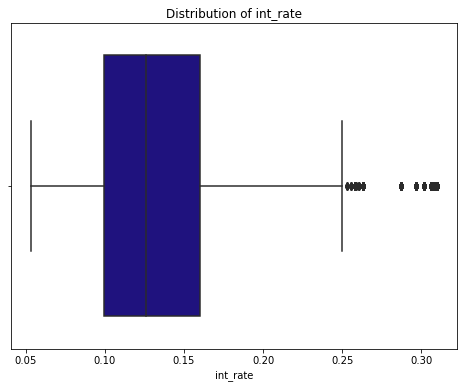

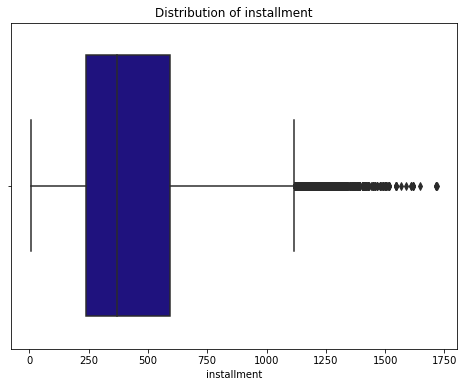

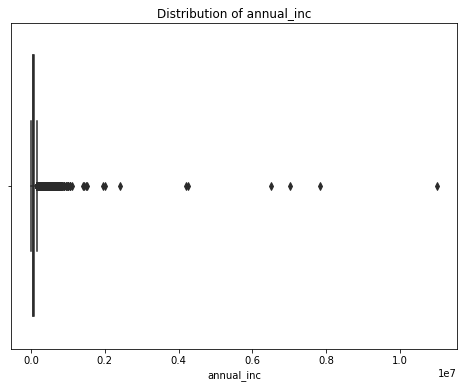

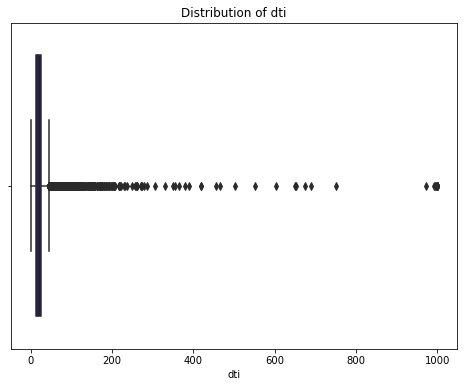

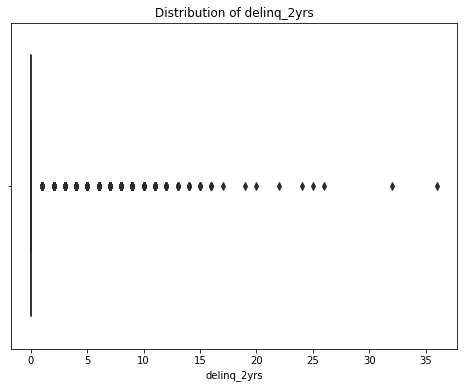

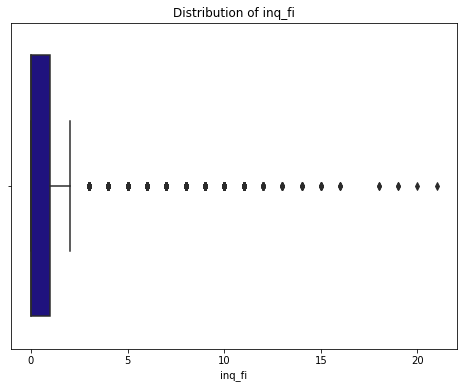

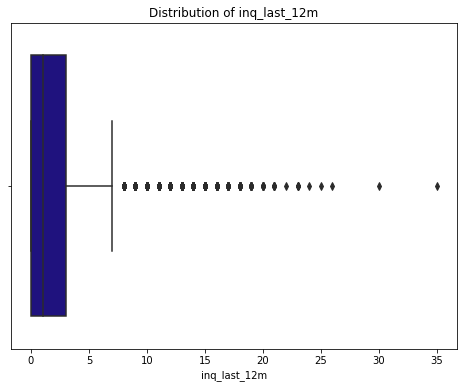

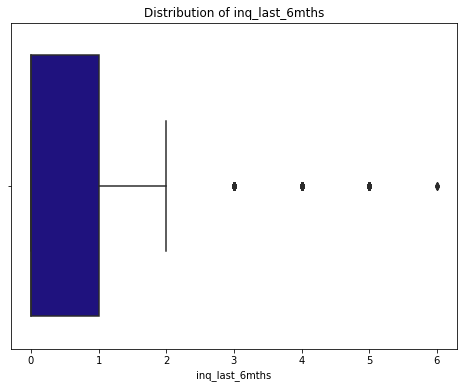

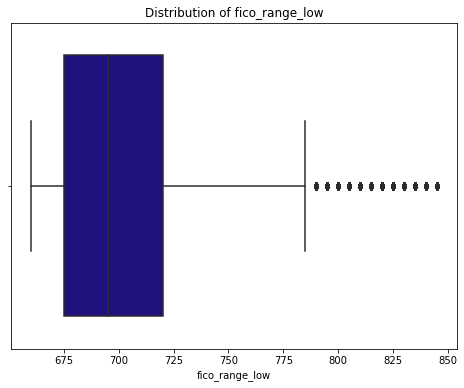

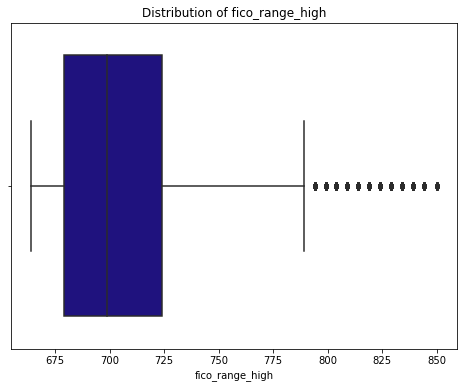

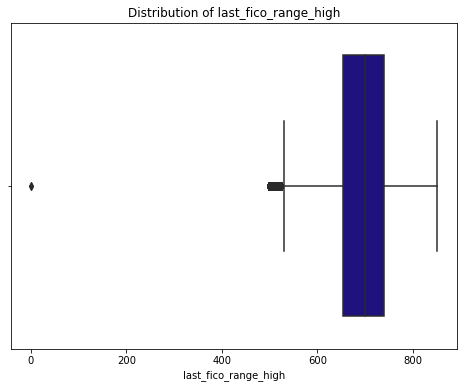

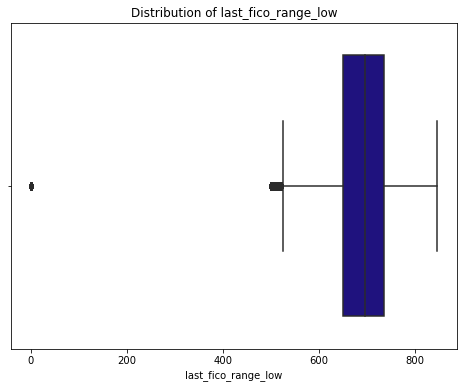

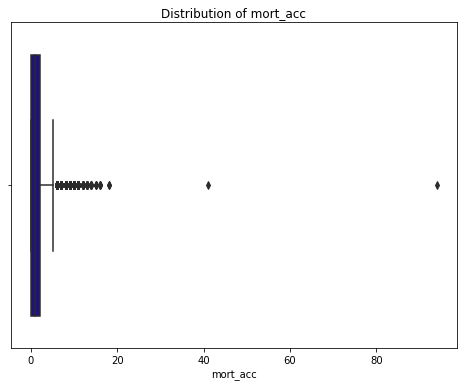

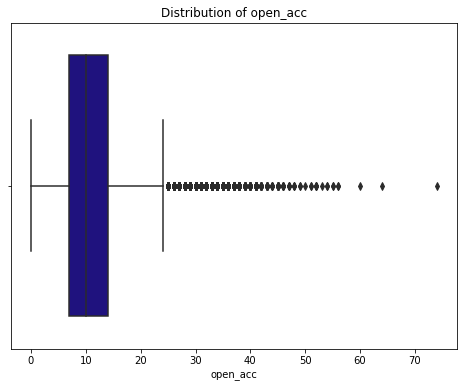

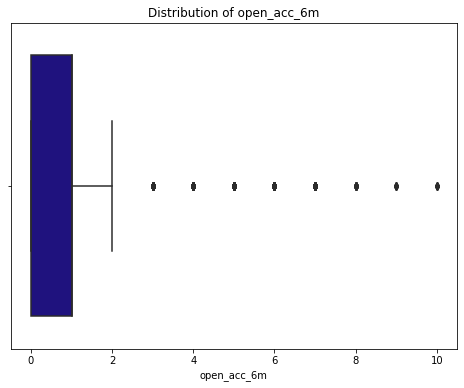

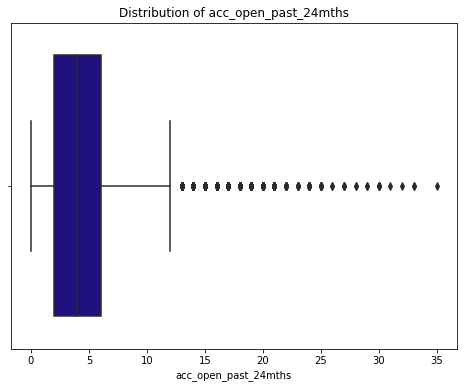

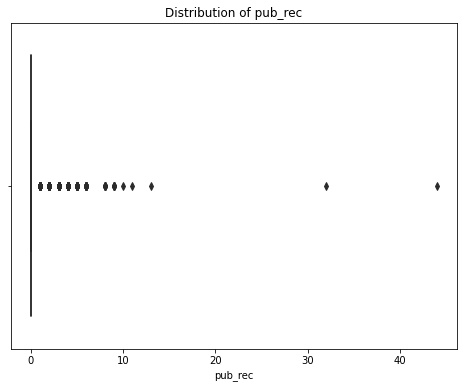

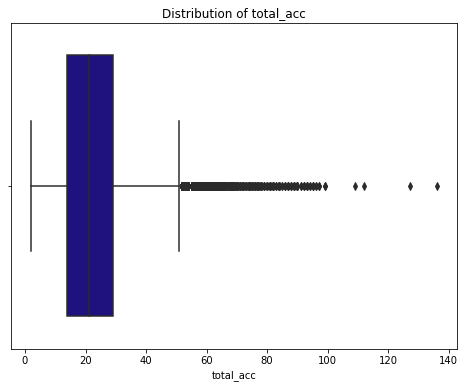

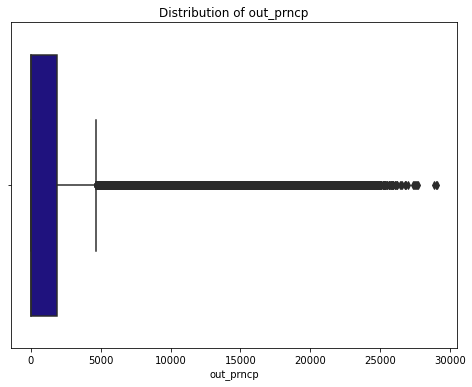

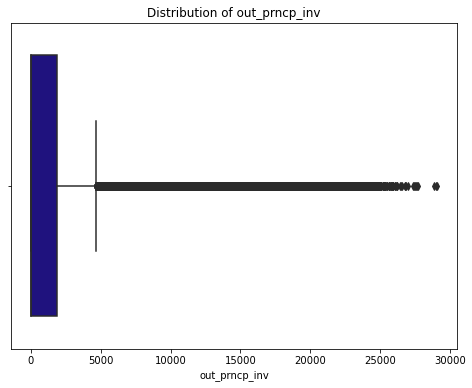

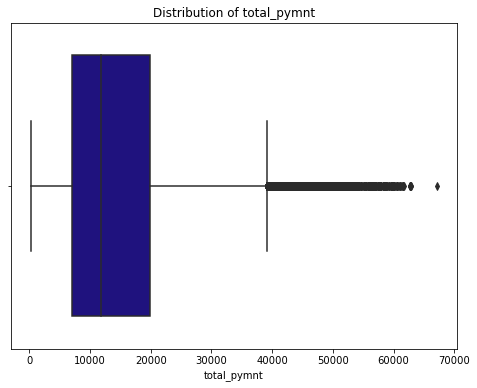

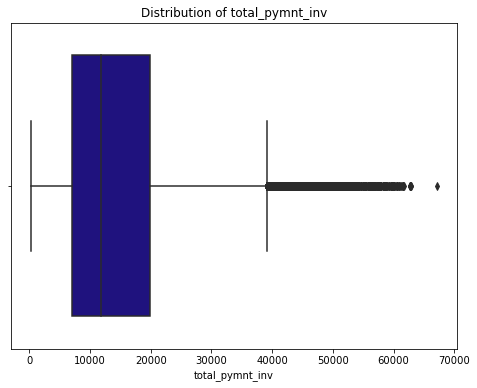

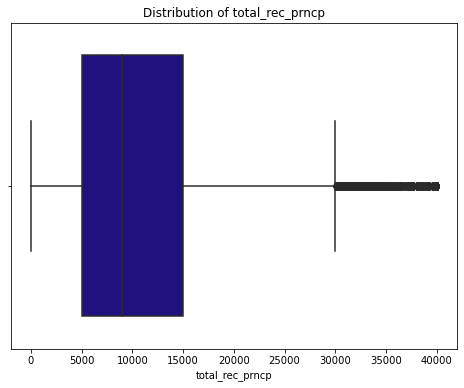

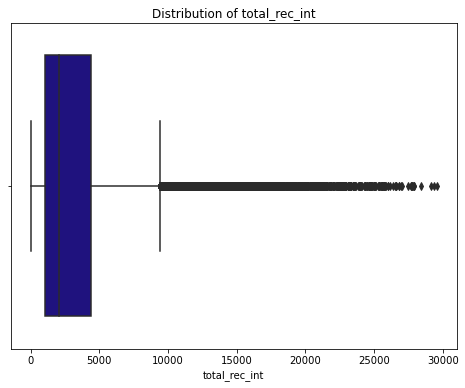

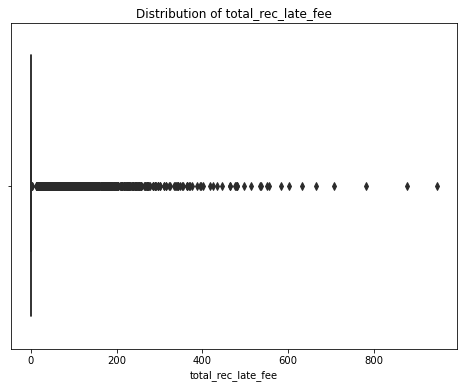

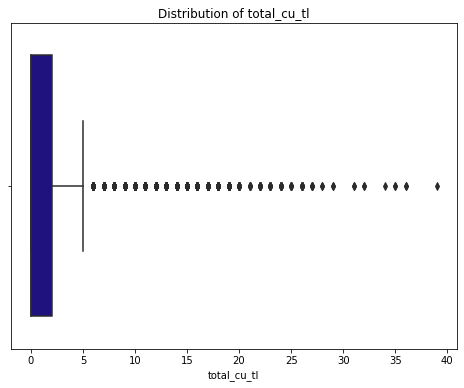

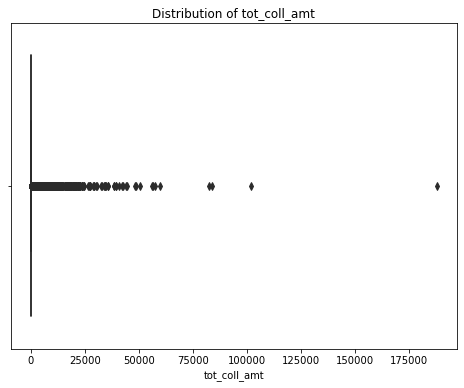

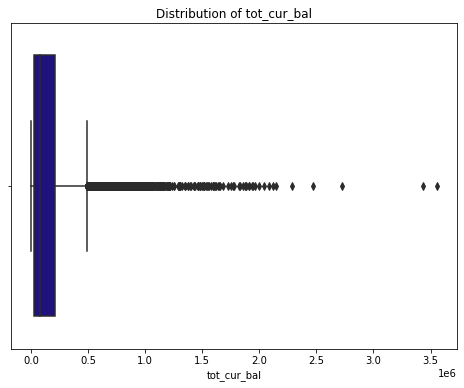

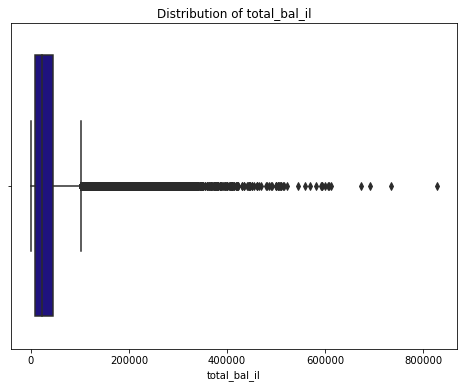

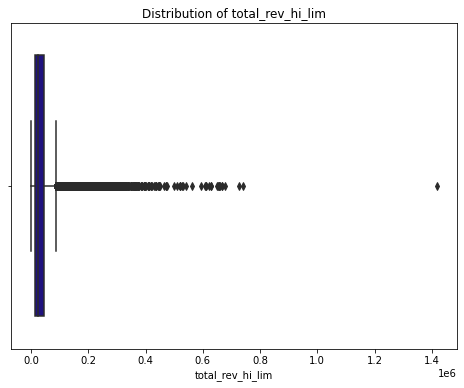

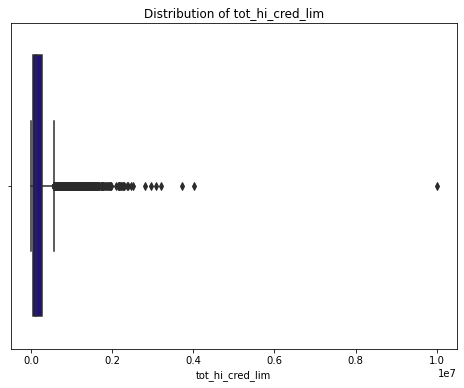

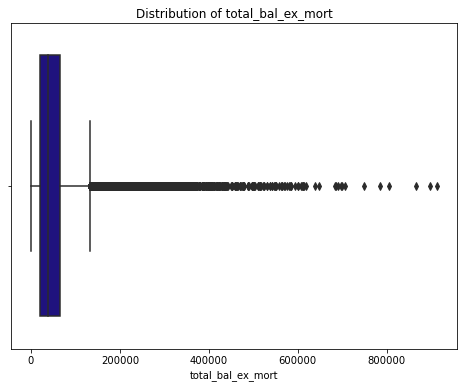

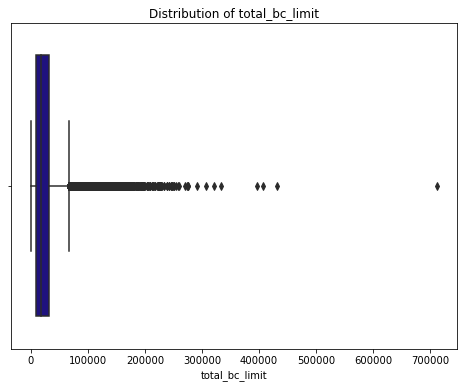

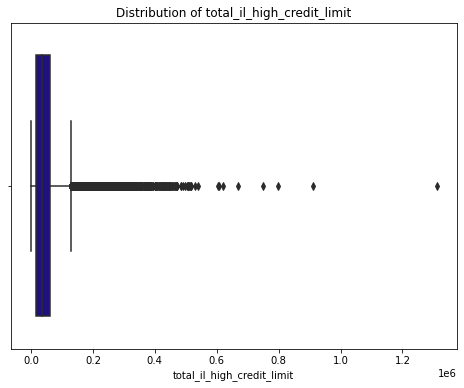

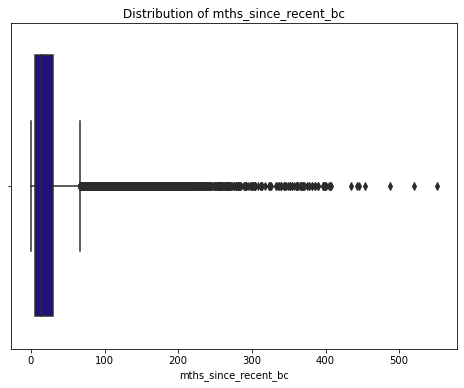

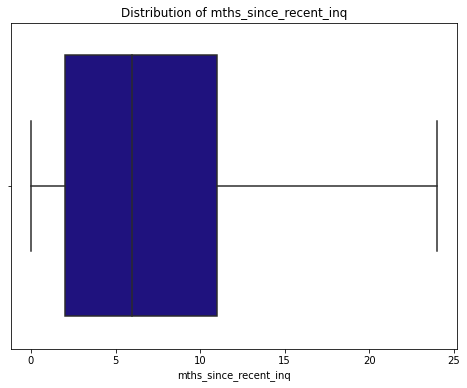

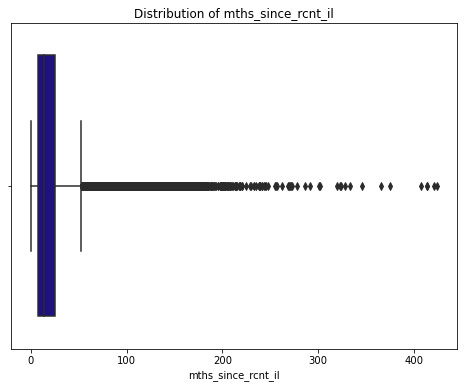

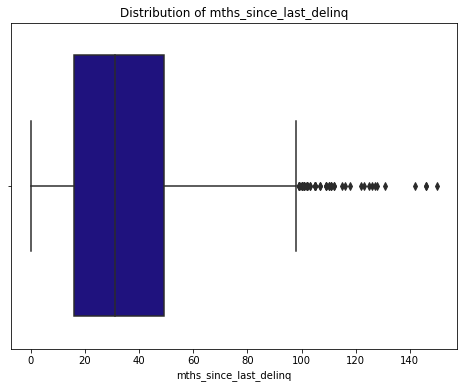

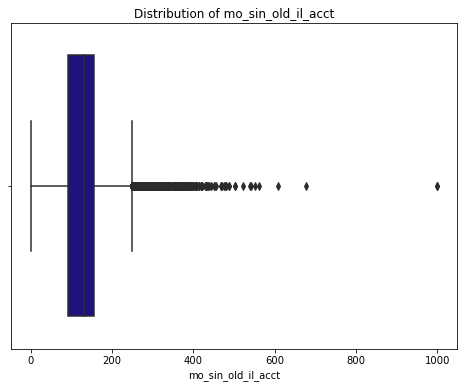

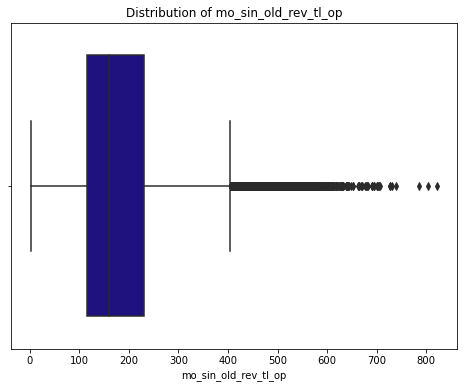

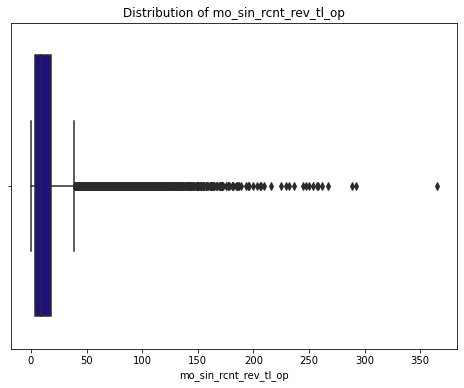

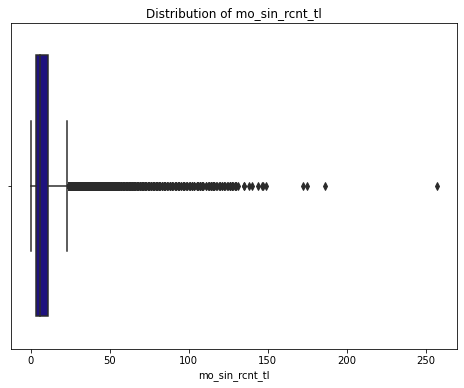

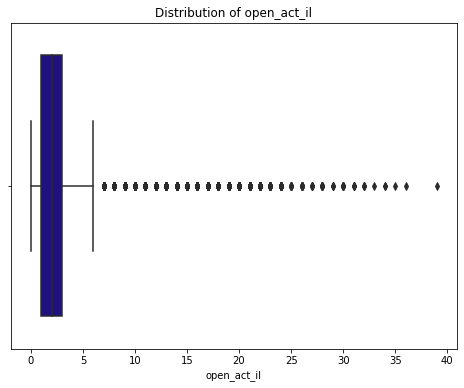

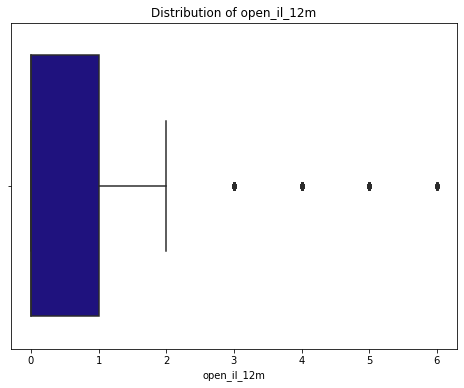

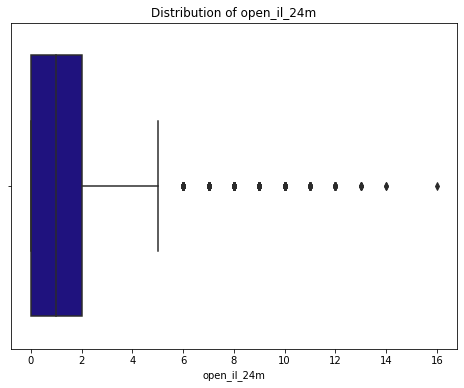

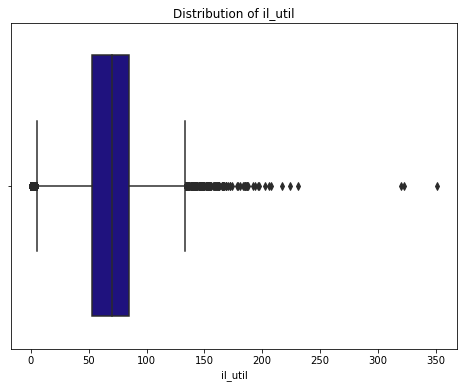

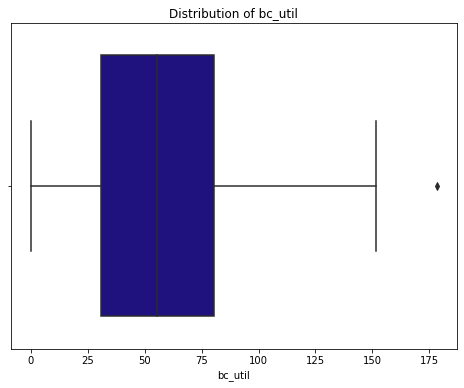

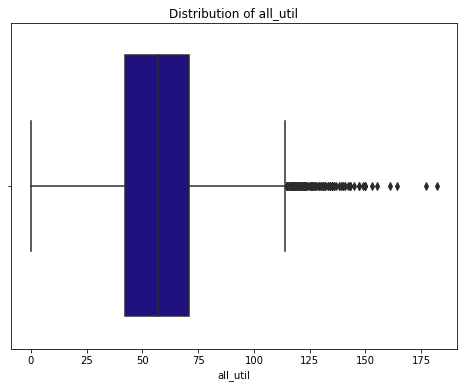

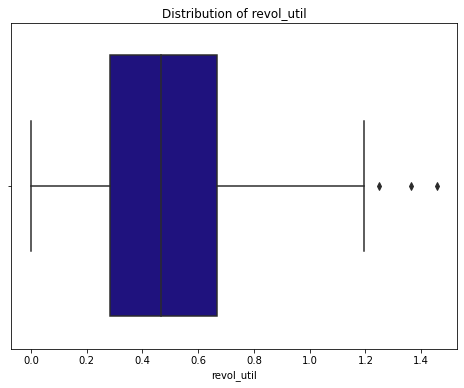

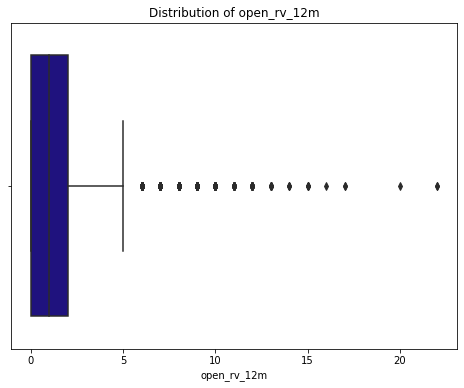

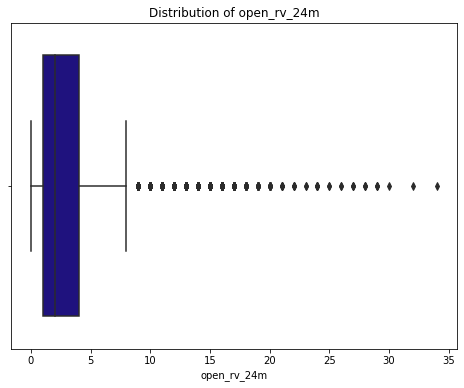

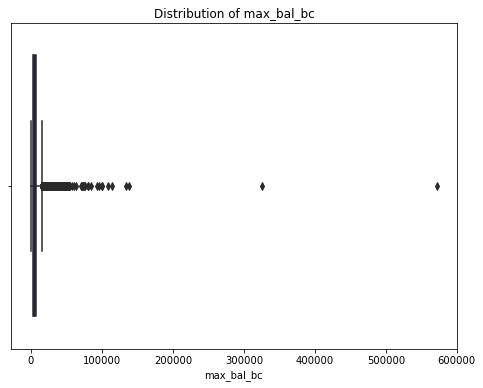

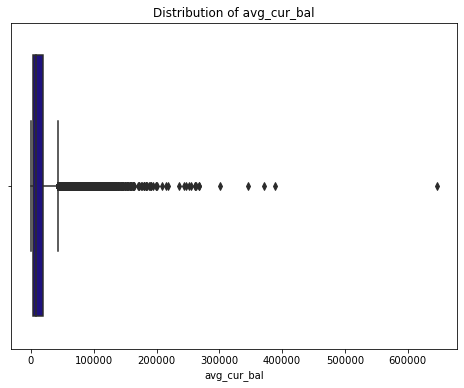

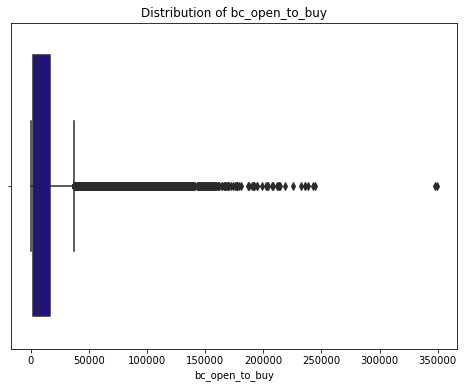

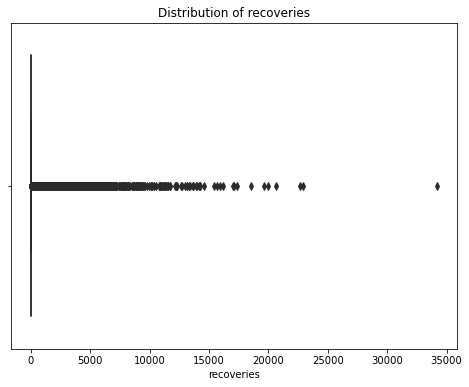

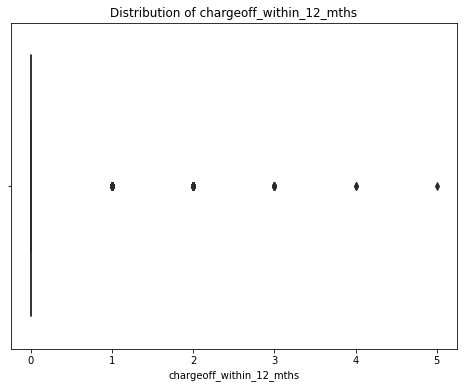

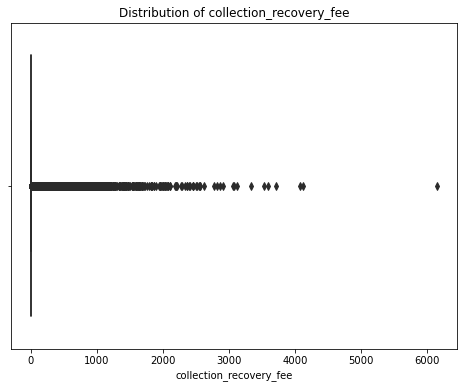

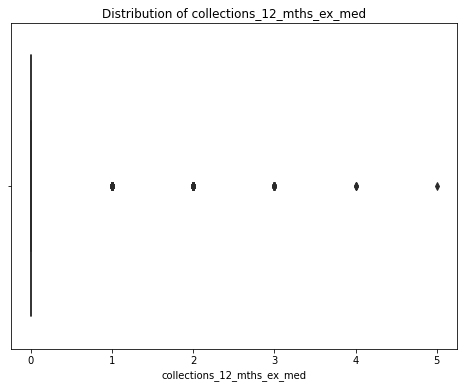

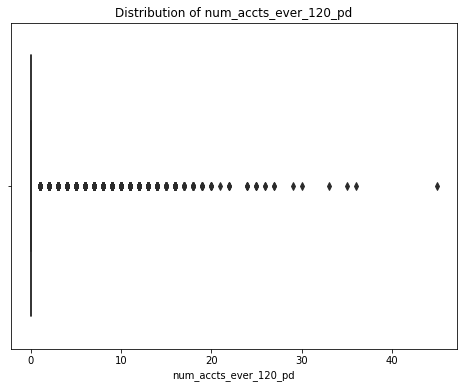

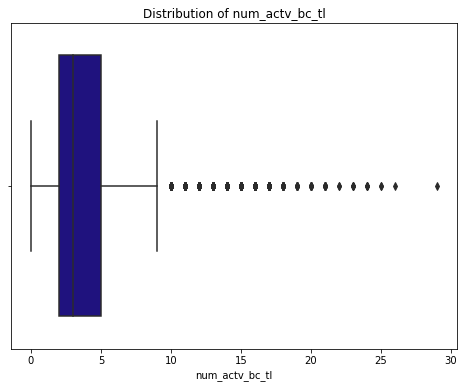

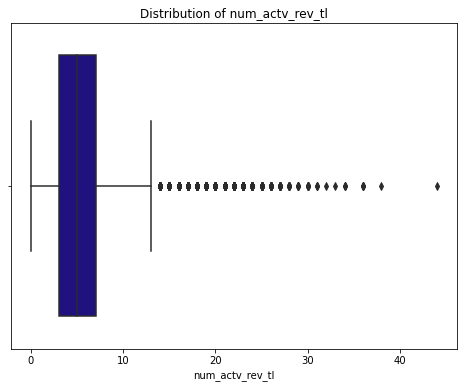

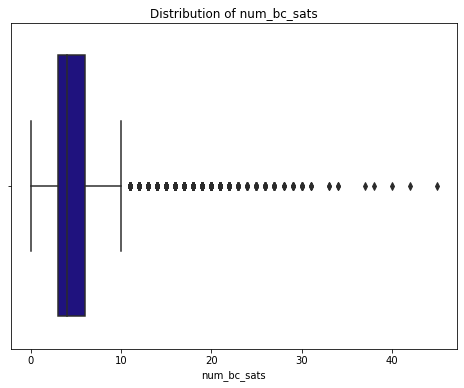

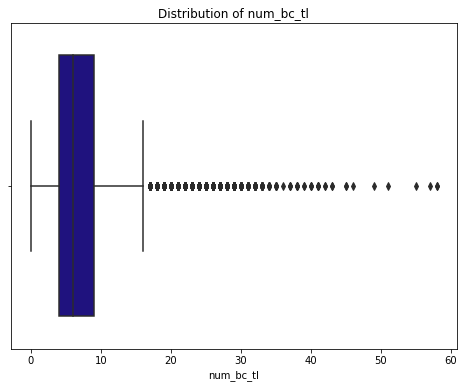

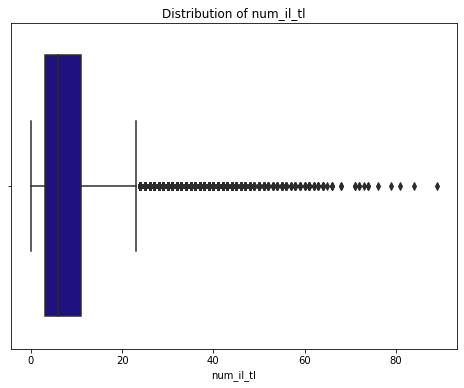

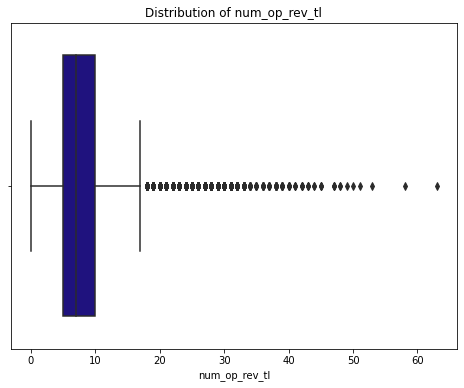

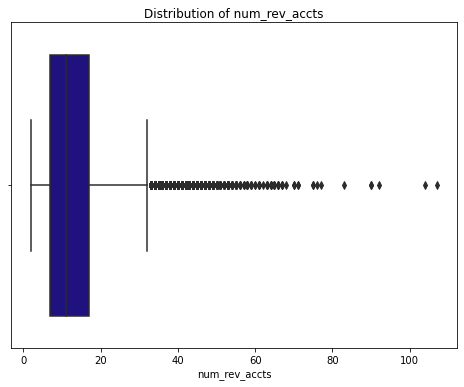

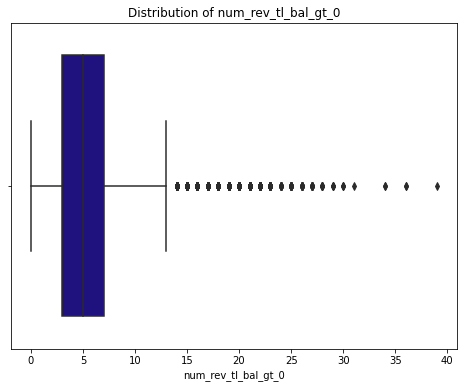

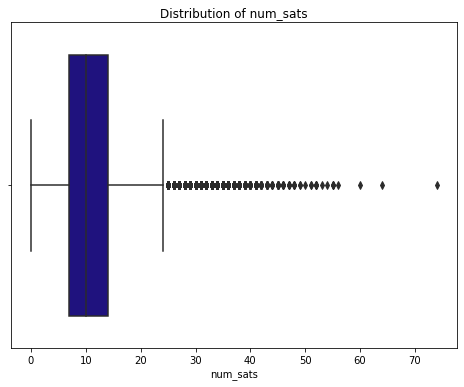

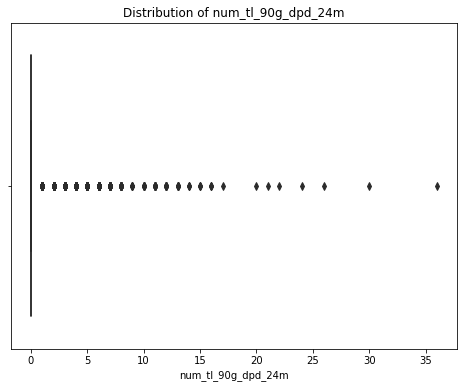

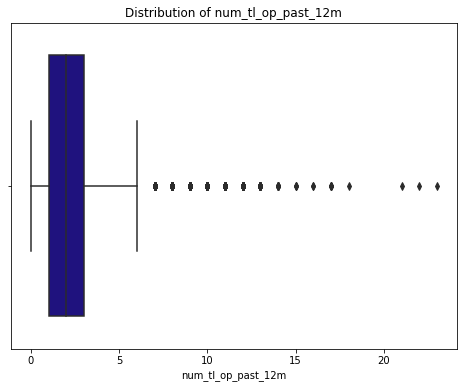

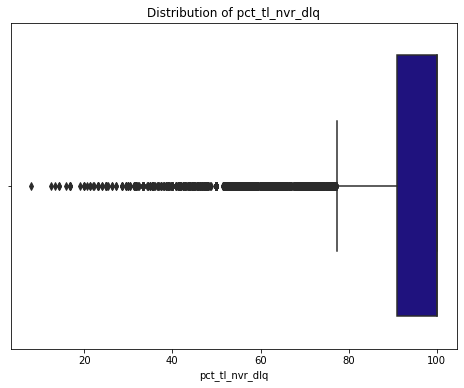

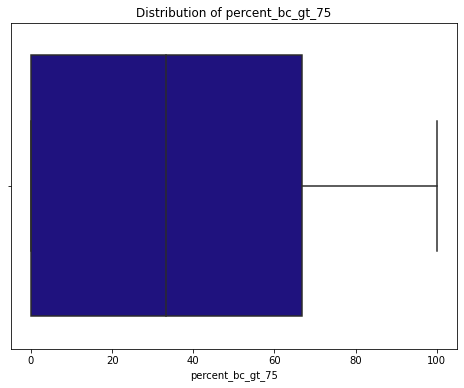

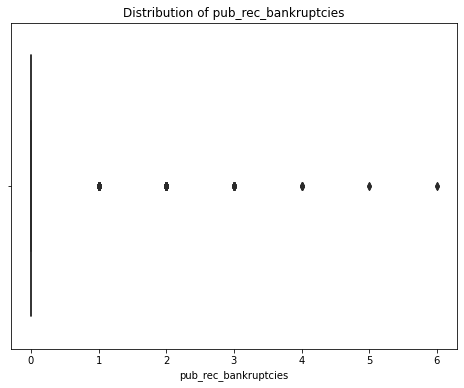

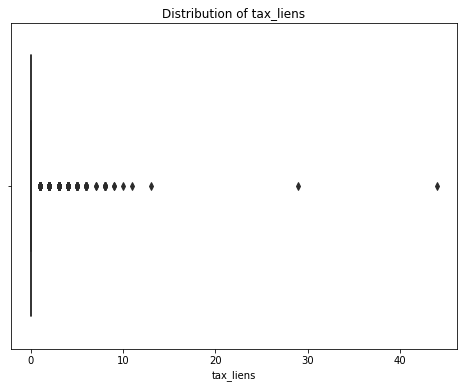

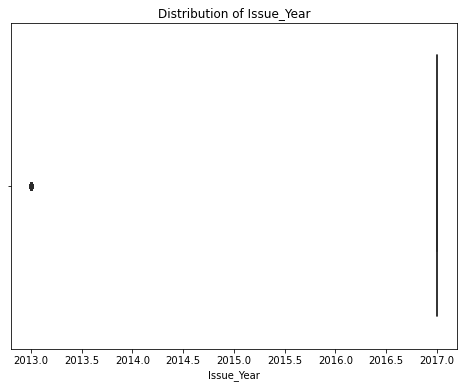

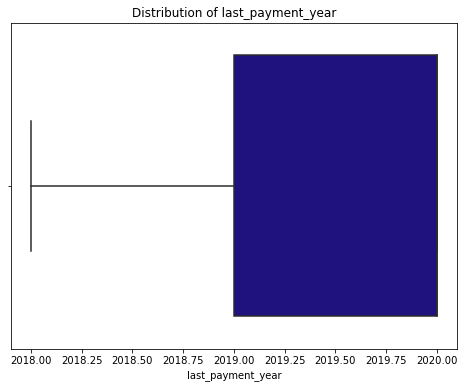

In [62]:
def box_plot(cols,data):
    plt.figure(figsize=(8,6))
    plt.title('Distribution of '+cols)
    sns.boxplot(x=data[cols],color='#120090')

for cols in num_cols:
    box_plot(cols,club_loan_data)

The above Visualisation shows the presence of Possible Outliers

In [63]:
def cat_unique(col,data):
    print(data[col].unique())
for k in cat_cols:
    cat_unique(k,club_loan_data)

['Individual' 'Joint App']
['RENT' 'MORTGAGE' 'OWN' 'NONE' 'ANY']
['Fully Paid' 'Charged Off' 'Current' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default']
['36 months' '60 months']
['C' 'D' 'A' 'B' 'E' 'G' 'F']
['Verified' 'Not Verified' 'Source Verified']
['debt_consolidation' 'home_improvement' 'other' 'medical' 'credit_card'
 'vacation' 'house' 'major_purchase' 'small_business' 'moving' 'car'
 'renewable_energy' 'wedding']
['N' nan 'Y']
['w' 'f']


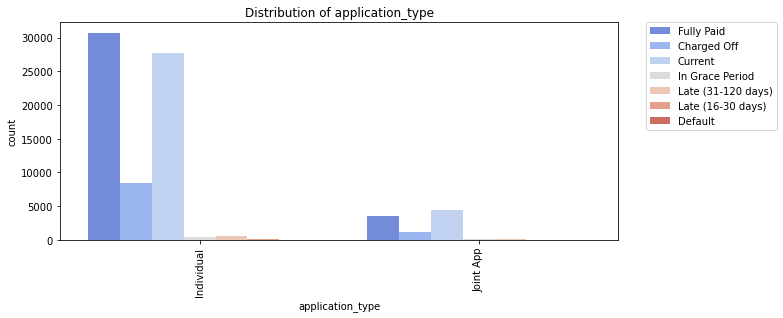

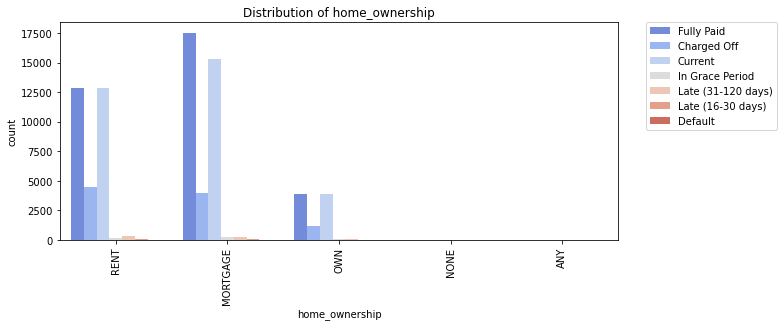

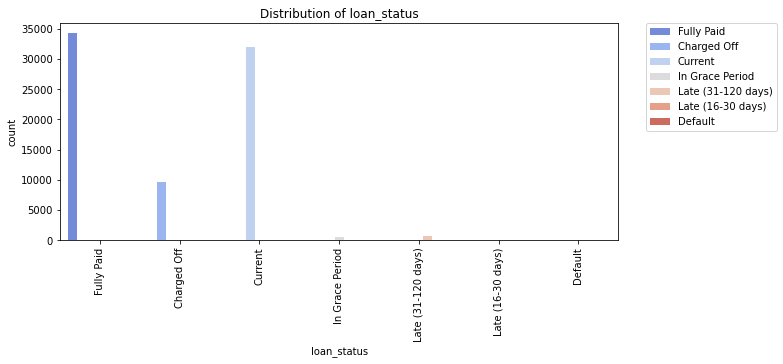

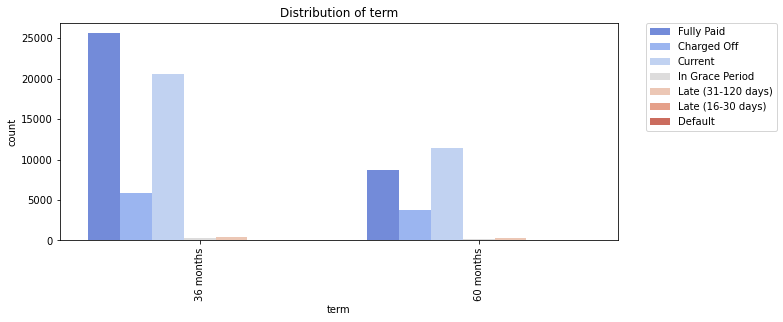

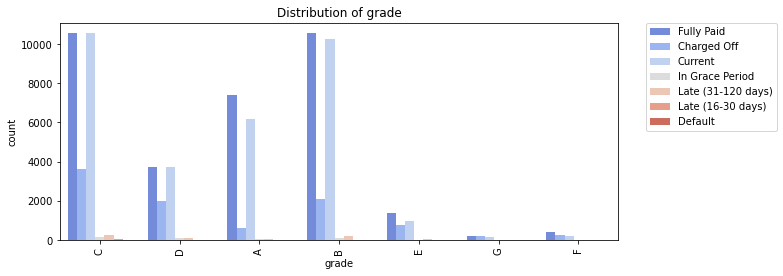

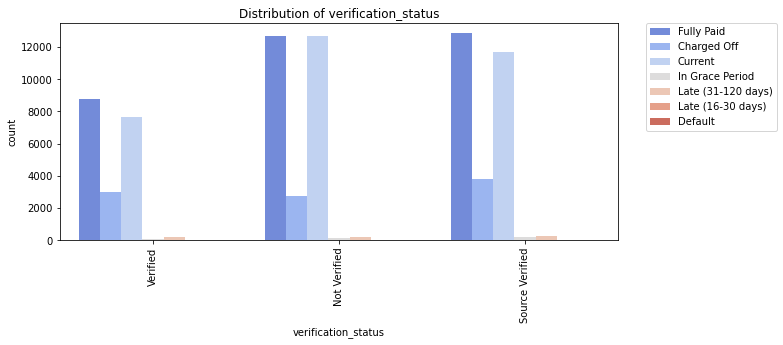

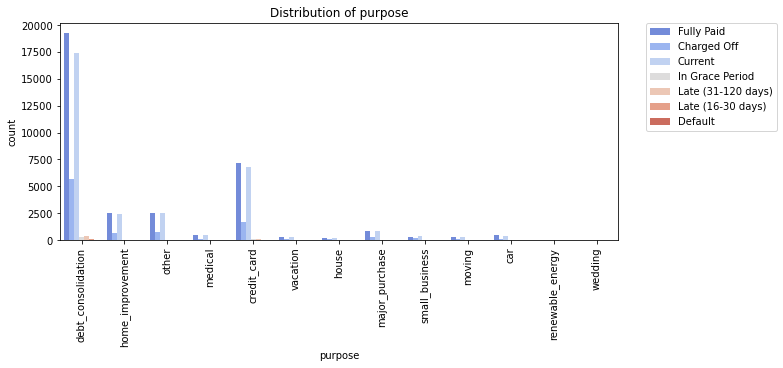

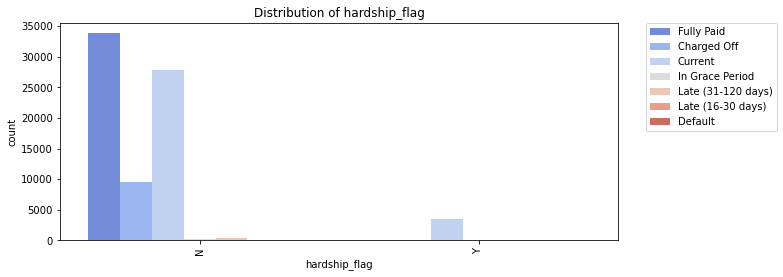

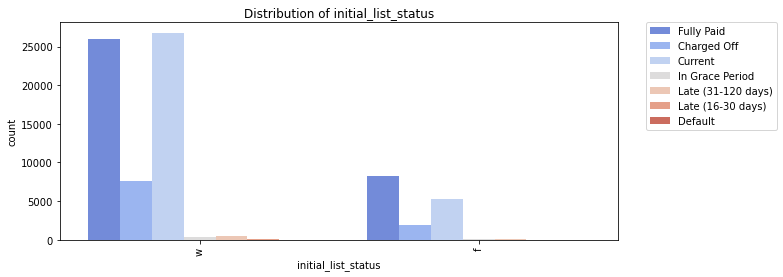

In [64]:
def count_plots_for_cat_columns(data,hue,cols):
    plt.figure(figsize=(10,4))
    #Set labels to be vertical in the axis
    plt.xticks(rotation=90)
    # produce a plot 
    sns.countplot(x=cols,hue=data['loan_status'],palette="coolwarm",data=data)
    #include a dynamic title
    plt.title("Distribution of " +cols)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

for cols in cat_cols: 
    count_plots_for_cat_columns(club_loan_data,'loan_status',cols)

##### Encoding the Labels with `Label Encoder`  and Transforming the problem into `Bianry`

In [65]:
club_loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [66]:
club_loan_data['loan_status'].value_counts()

Fully Paid            34289
Current               32039
Charged Off            9614
Late (31-120 days)      659
In Grace Period         448
Late (16-30 days)        96
Default                  14
Name: loan_status, dtype: int64

`Here`

    •	Default means that loan has been declared as being in default and a recovery process has been initiated (Bad Loan).
    •	Late (31-120 days) refers to a loan that is 31-120 days late (Bad Loan).
    •	Late (16-30 days) refers to a loan that is 16-30 days late (Bad loan).
    •	A borrower or insurance customer with an In-Grace Period may postpone payment for a limited period after the due date.         There are no late fees during this period, and the delay cannot result in default or contract termination (Bad Loan).
    •	The term "fully paid" refers to a loan that has been paid in full (Good Loan).
    •	Current indicates that the loan is still active and is not past due, indicating that it may be a good or bad loan. I'm         developing on a model that can predict whether a loan is good or bad. As a result, I'm removing all the samples that           are labelled as Current here. (Not sure)
    •	The word "charge off" denotes that the original borrower has given up on receiving payment in accordance with the        loan's original terms. It is a bad loan because it considers the unpaid balance to be bad debt


As the purpose is to classify the new samples/customer as a potential good loaner or bad loaner rather than they will be paying their loan late or will be categorized as charged off. So I am transforming this multi class classification into binary class problem (Good or Bad Loan).

In [67]:
 club_loan_data.drop(club_loan_data[club_loan_data.loan_status == 'Current'].index,inplace=True)

In [68]:
print(club_loan_data.shape)

(45120, 86)


In [69]:
print(club_loan_data['loan_status'].unique())
print(club_loan_data.shape)

['Fully Paid' 'Charged Off' 'In Grace Period' 'Late (31-120 days)'
 'Late (16-30 days)' 'Default']
(45120, 86)


In [70]:
club_loan_data['loan_status']=club_loan_data['loan_status'].replace(['Late (31-120 days)','In Grace Period','Late (16-30 days)','Default','Charged Off'],'Bad Loan')
club_loan_data.head()

,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,...,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,Issue_Year,last_payment_year
0,Individual,RENT,Fully Paid,35000,0.1505,36 months,1214.15,C,110000.0,Verified,...,5,7,0,1,80.0,0.0,0,0,2017,2020
1,Individual,RENT,Bad Loan,21000,0.1408,60 months,489.51,C,54000.0,Not Verified,...,5,13,0,1,100.0,33.3,1,0,2017,2019
3,Individual,RENT,Fully Paid,16000,0.1903,36 months,586.74,D,58000.0,Source Verified,...,8,10,0,2,95.7,75.0,1,0,2017,2019
4,Individual,MORTGAGE,Fully Paid,24000,0.0890,60 months,497.04,A,94020.0,Verified,...,4,12,0,1,100.0,0.0,0,0,2013,2019
5,Individual,MORTGAGE,Bad Loan,35000,0.2000,60 months,927.29,D,110000.0,Verified,...,1,11,0,6,100.0,0.0,0,0,2017,2018


In [71]:
club_loan_data['loan_status']=club_loan_data['loan_status'].replace(['Fully Paid'],'Good Loan')
club_loan_data.head()

,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,...,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,Issue_Year,last_payment_year
0,Individual,RENT,Good Loan,35000,0.1505,36 months,1214.15,C,110000.0,Verified,...,5,7,0,1,80.0,0.0,0,0,2017,2020
1,Individual,RENT,Bad Loan,21000,0.1408,60 months,489.51,C,54000.0,Not Verified,...,5,13,0,1,100.0,33.3,1,0,2017,2019
3,Individual,RENT,Good Loan,16000,0.1903,36 months,586.74,D,58000.0,Source Verified,...,8,10,0,2,95.7,75.0,1,0,2017,2019
4,Individual,MORTGAGE,Good Loan,24000,0.0890,60 months,497.04,A,94020.0,Verified,...,4,12,0,1,100.0,0.0,0,0,2013,2019
5,Individual,MORTGAGE,Bad Loan,35000,0.2000,60 months,927.29,D,110000.0,Verified,...,1,11,0,6,100.0,0.0,0,0,2017,2018


In [72]:
club_loan_data.shape

(45120, 86)

###### Defining Features and Lables

In [73]:
np.random.seed(40) # To make results reproduceable
#club_loan_data=club_loan_data.sample(frac=1)
x=club_loan_data.drop('loan_status',axis=1) #features
y=club_loan_data['loan_status'] # Label

In [74]:
print(x.shape,y.shape)

(45120, 85) (45120,)


In [75]:
y=y.to_frame('loan_status')
y

,loan_status
0,Good Loan
1,Bad Loan
3,Good Loan
4,Good Loan
5,Bad Loan
...,...
77151,Bad Loan
77152,Good Loan
77156,Good Loan
77157,Good Loan


In [76]:
y.value_counts()

loan_status
Good Loan      34289
Bad Loan       10831
dtype: int64

In [77]:
print(x.shape)
print(y.shape)

(45120, 85)
(45120, 1)


##### Encoding the Labels with `Label Encoder` 

In [78]:
from sklearn import preprocessing 
  

label_encoder = preprocessing.LabelEncoder() 
  
y['loan_status']= label_encoder.fit_transform(y['loan_status'])

In [79]:
y['loan_status'].unique()

array([1, 0])

In [80]:
print(y[y['loan_status']==0].value_counts())
print(y[y['loan_status']==1].value_counts())

loan_status
0              10831
dtype: int64
loan_status
1              34289
dtype: int64


This Show that `Label Encoder` is encoding the labels `Alphabatically`

    0= Bad Loan
    1= Good Loan

In [81]:
num_cols=x.select_dtypes(exclude=['object','datetime64[ns]']).columns
len(num_cols)

77

In [82]:
cat_cols=x.select_dtypes(include='object').columns
cat_cols

Index(['application_type', 'home_ownership', 'term', 'grade',
       'verification_status', 'purpose', 'hardship_flag',
       'initial_list_status'],
      dtype='object')

In [83]:
print(len(num_cols))
print(len(cat_cols))
print(len(date_cols))

77
8
0


In [84]:
x[cat_cols].describe()

,application_type,home_ownership,term,grade,verification_status,purpose,hardship_flag,initial_list_status
count,45120,45120,45120,45120,45120,45120,44281,45120
unique,2,5,2,7,3,13,2,2
top,Individual,MORTGAGE,36 months,C,Source Verified,debt_consolidation,N,w
freq,40109,22048,32241,14603,17182,25626,44168,34679


I am applying here pandas dummies function to get numerical dummies values of cat_columns with 2 Unique values with as it will not Increase the Dimensionality of my dataset too much and I am encoding the remaining cat_cols with `Ordinal Encoder`. I am not using `Label Encoder` here as they introduce relation/comparison between unique values of the features while giving them label. Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them.

In [85]:
dummies=['application_type','term','hardship_flag','initial_list_status']

In [86]:
def missing_check_cat(i,data):
    print(data[i].isna().sum())
for i in dummies:
    missing_check_cat(i,x)

0
0
839
0


As `hardship_flag` has 839 missing values and and is a categorical column. So I can impute these missing values with most frequent values in that feature which is `N` whose frequency is `44168` . I am doing this before split as it is categorical columns and after splitting it into test set I will have to do this same over there. So I am doing this now

In [87]:
x['hardship_flag'].fillna('N',inplace=True)

In [88]:
#dumy_var=pd.get_dummies(data=x[dummies],drop_first=True,dtype=int)
#dumy_var

###### Check Dummies

In [89]:
print(x.shape)
for column in dummies:
    dummy_df = pd.get_dummies(x[column], prefix=column,dtype=int)
    x = pd.merge(
        left=x,
        right=dummy_df,
        left_index=True,
        right_index=True,
    )
    x = x.drop(columns=column)
print(x.shape)
print(x)

(45120, 85)
(45120, 89)
      home_ownership  loan_amnt  int_rate  installment grade  annual_inc  \
0               RENT      35000    0.1505      1214.15     C    110000.0   
1               RENT      21000    0.1408       489.51     C     54000.0   
3               RENT      16000    0.1903       586.74     D     58000.0   
4           MORTGAGE      24000    0.0890       497.04     A     94020.0   
5           MORTGAGE      35000    0.2000       927.29     D    110000.0   
...              ...        ...       ...          ...   ...         ...   
77151       MORTGAGE      25000    0.2582       745.85     E     61200.0   
77152       MORTGAGE      29475    0.2485      1169.59     E     47000.0   
77156           RENT       7000    0.0532       210.81     A    148000.0   
77157            OWN      12800    0.2000       475.70     D     55000.0   
77158       MORTGAGE       2400    0.0993        77.37     B     51567.0   

      verification_status             purpose    dti  delinq_2y

In [90]:
#### dropping the original Columns from the x as I have encoded version of them
#x.drop(['application_type','term','hardship_flag','initial_list_status'],axis=1,inplace=True)
#x.shape

In [91]:
cat_cols=x.select_dtypes(include='object').columns
cat_cols

Index(['home_ownership', 'grade', 'verification_status', 'purpose'], dtype='object')

In [92]:
a=x[cat_cols]

In [93]:
b=x.iloc[:,81:90]

In [94]:
cat_encoded_df=pd.concat([a,b],axis=1)
cat_encoded_df.head()

,home_ownership,grade,verification_status,purpose,application_type_Individual,application_type_Joint App,term_36 months,term_60 months,hardship_flag_N,hardship_flag_Y,initial_list_status_f,initial_list_status_w
0,RENT,C,Verified,debt_consolidation,1,0,1,0,1,0,0,1
1,RENT,C,Not Verified,debt_consolidation,1,0,0,1,1,0,0,1
3,RENT,D,Source Verified,debt_consolidation,1,0,1,0,1,0,0,1
4,MORTGAGE,A,Verified,debt_consolidation,1,0,0,1,1,0,0,1
5,MORTGAGE,D,Verified,other,1,0,0,1,1,0,0,1


In [95]:
import category_encoders as ce

encoder_2 = ce.OrdinalEncoder(cols=cat_cols,handle_missing='return_nan',return_df= True)

x=encoder_2.fit_transform(x)
print(x.shape)

(45120, 89)


In [96]:
len(num_cols)

77

In [97]:
len(cat_cols)

4

In [98]:
x.shape

(45120, 89)

In [99]:
x.to_csv('data_without_current.csv',index=False)
y.to_csv('data_without_current_labels.csv',index=False)

```Note```

Now I am going with the strategy of finding an `outlier` first and then impute the `missing values`. Because if I impute the missing value first then find the outliers then, outliers value will also be getting used to fill the missing value. Which I don't want. I am also splitting the data into train, validation and test split before finding an outlier because. If I split the data after finding outlier then my data will get mismatched with my training and test set and in turn my test set may grab some pattren from the training set. Which is a poor strategy. But their is also a possibility that if I split first may be one of the set may contain majority of the sample outlier. But I can deal with that by shuffling the data set. 

In [100]:
np.random.seed(40)
from sklearn.model_selection import train_test_split


part1_X,x_test, part1_y, y_test= train_test_split (x,y, test_size=0.2)
x_train,x_valid, y_train, y_valid= train_test_split (part1_X,part1_y, test_size=0.2)

In [101]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)
print('*********')
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(28876, 89)
(7220, 89)
(9024, 89)
*********
(28876, 1)
(7220, 1)
(9024, 1)


##### Plotting the labels of train validation and test split to get an insight wether the classes are balanced or not in different sets

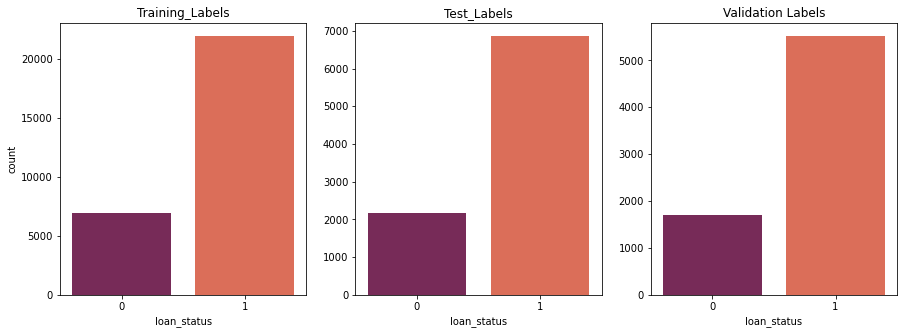

In [102]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.countplot(x='loan_status',data=y_train,ax=ax[0],palette='rocket')
ax[0].set_title('Training_Labels')
sns.countplot(x='loan_status',data=y_test,ax=ax[1],palette='rocket').set(ylabel=None)
ax[1].set_title('Test_Labels')
sns.countplot(x='loan_status',data=y_valid,ax=ax[2],palette='rocket').set(ylabel=None)
ax[2].set_title('Validation Labels')
plt.savefig('Label_values.png')

##### Outlier Removal

I am using `Isolation forest ` to find outlier because `Inter Quartile Range` and`z-score` perform anomaly detection feature wise and are more reliable on low dimensinality data and when the problem is a regression one. Here I had `108 features` which is a high dimensionality data so `Isolation Forest` is best choice because it perform best in a High Dimesionality data.

Also their are some other Anomaly Detection algorithm such as `Local Outlier Factor`.This can work well for feature spaces with low dimensionality (few features), although it can become less reliable as the number of features is increased, referred to as the curse of dimensionality.

##### Isolation Forest

I am only checking for outliers in Numerical Data. Because For an outlier to exist there must be a measure of distance. This is intrinsic to numeric data types because there is a Euclidean distance between numbers.

In [112]:
# Setting up a random seed
np.random.seed(40)

#import the implementation of this algorihm from sklearn
from sklearn.ensemble import IsolationForest

#Any point labelled as -1 is an outlier
I_F= IsolationForest(max_samples=28876, contamination= 0.01) # As according to general perception nothing is outlier in a finance related dataset. But looking at the different box plot I am setting up the contamination value to  be '0.1'. Also the Contamination value is decided by the Subject Matter Expert so I am going with the lowest possible value of 0.01. Because visualisation the box plot gave an indication that this dataset may have some outlier
preds_I_F = I_F.fit_predict(x_train_copy[num_cols]) # As Date and Categorical columns can't have any outlier So I am passing here only num_cols
print(preds_I_F)
outliers_count_db=0
for pred in preds_I_F:
    if pred == -1:
        outliers_count_db=outliers_count_db + 1
print("Total number of outliers identified is: ",outliers_count_db)

[1 1 1 ... 1 1 1]
Total number of outliers identified is:  289


As I am getting `Input contains NaN, infinity or a value too large for dtype('float64')` error so I will need to fill the missing values in `x_train` to run the ouliers detection algorithms. So I am making a copy of training set and imputing that with `zero` because imputation of `zeros` will not bring any change in the training set. As it will not effect the mean or median of the dataset

In [105]:
x_train_copy=x_train.copy()
x_train_copy.head()

,home_ownership,loan_amnt,int_rate,installment,grade,annual_inc,verification_status,purpose,dti,delinq_2yrs,...,Issue_Year,last_payment_year,application_type_Individual,application_type_Joint App,term_36 months,term_60 months,hardship_flag_N,hardship_flag_Y,initial_list_status_f,initial_list_status_w
70567,2.0,18975,0.0944,607.30,4.0,135000.0,2.0,3.0,13.52,0,...,2017,2018,1,0,1,0,1,0,0,1
72285,1.0,6600,0.1602,232.11,1.0,60000.0,3.0,7.0,19.93,0,...,2017,2018,1,0,1,0,1,0,0,1
26324,3.0,16000,0.1199,355.84,4.0,60000.0,3.0,2.0,13.24,0,...,2017,2018,1,0,0,1,1,0,0,1
49908,1.0,19000,0.0993,612.46,4.0,53500.0,2.0,3.0,8.61,0,...,2017,2020,1,0,1,0,1,0,1,0
43796,2.0,24000,0.2145,655.38,2.0,96000.0,1.0,3.0,34.88,0,...,2017,2019,1,0,0,1,1,0,0,1


In [106]:
x_train_copy.shape

(28876, 89)

In [107]:
for i in num_cols:
    missing_check_num(i,x_train_copy)

0
0
0
0
33
0
1634
1634
0
0
0
0
0
0
0
1634
0
0
0
0
0
0
0
0
0
0
1634
0
0
1634
0
0
0
0
0
404
3016
2483
14707
878
0
0
0
1634
1634
1634
5535
454
1639
42
1634
1634
1634
2
436
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
436
0
0
0
0


As I only have Missing Values in Numerical Columns. So I am Imputing it with the `zero` as it will not affect the mean or medain of the data

In [108]:
def copy_fill(col,data):
    data[col].fillna(0,inplace=True)
for col in num_cols:
    copy_fill(col,x_train_copy)

In [109]:
q=x_train_copy.isna().sum()
q[q>0]

Series([], dtype: int64)

In [110]:
q=x_train.isna().sum()
q[q>0]
#### Showing that x_train original has still missing values

dti                          33
inq_fi                     1634
inq_last_12m               1634
open_acc_6m                1634
total_cu_tl                1634
total_bal_il               1634
mths_since_recent_bc        404
mths_since_recent_inq      3016
mths_since_rcnt_il         2483
mths_since_last_delinq    14707
mo_sin_old_il_acct          878
open_act_il                1634
open_il_12m                1634
open_il_24m                1634
il_util                    5535
bc_util                     454
all_util                   1639
revol_util                   42
open_rv_12m                1634
open_rv_24m                1634
max_bal_bc                 1634
avg_cur_bal                   2
bc_open_to_buy              436
pct_tl_nvr_dlq                5
percent_bc_gt_75            436
dtype: int64

In [111]:
print(x_train.shape)
print(y_train.shape)

(28876, 89)
(28876, 1)


###### Mask Creation and applying that Mask to original x_train

In [113]:
# select all rows that are not outliers and create a boolean mask based on Local Outlier Factor
Mask = preds_I_F!= -1
# Apply mask to y and check shape
y_train= y_train[Mask]
print (y_train.shape)

#Apply mask to X and check shape 
x_train=x_train[Mask]
print(x_train.shape)

(28587, 1)
(28587, 89)


In [114]:
#fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
#plt.suptitle('Distribution of Last Fico range (High)')

#sns.boxplot(x='last_fico_range_high',data=club_loan_data,ax=ax[0],palette='rocket')
#sns.boxplot(x='last_fico_range_high',data=x_train,ax=ax[1],palette='rocket')


###### Now I am Filling the Missing Value as I have eliminated the possible outliers 

In [115]:
q=x_train.isna().sum()
print(q[q>0])
print(x_train.shape)

dti                          33
inq_fi                     1619
inq_last_12m               1619
open_acc_6m                1619
total_cu_tl                1619
total_bal_il               1619
mths_since_recent_bc        396
mths_since_recent_inq      3003
mths_since_rcnt_il         2463
mths_since_last_delinq    14587
mo_sin_old_il_acct          873
open_act_il                1619
open_il_12m                1619
open_il_24m                1619
il_util                    5489
bc_util                     444
all_util                   1622
revol_util                   38
open_rv_12m                1619
open_rv_24m                1619
max_bal_bc                 1619
avg_cur_bal                   1
bc_open_to_buy              428
pct_tl_nvr_dlq                5
percent_bc_gt_75            428
dtype: int64
(28587, 89)


In [116]:
print(x_train.shape)

(28587, 89)


In [117]:
len(num_cols)

77

` Until Know I am only left with Missing Values in Numerical Columns. And I have removed the possible outliers in the dataset`

In [118]:
def missing_value_imputation_using_mean(col,data):
    data[col].fillna(data[col].mean(),inplace=True)
for col in num_cols:
    missing_value_imputation_using_mean(col,x_train)

### PreProcessing

##### Data Balancing, Duplicate Rows Removal and Feature Selection

##### Checking and  Removing Duplicate Rows

As Duplicate samples bring biasness in the DataSet so I am checking and Dropping the duplicate rows from the x_train.

In [119]:
print(len(x_train))
print(x_train.shape)

28587
(28587, 89)


In [120]:
duplicated_check=x_train.duplicated()
duplicated_check[duplicated_check=='True']

Series([], dtype: bool)

There are no duplicate rows in a dataset 

###### Data Balancing

In [121]:
y_train.value_counts()
print(len(x_train))
print(len(y_train))

28587
28587


In [122]:
(y_train.value_counts()*100)/len(y_train)

loan_status
1              76.076538
0              23.923462
dtype: float64

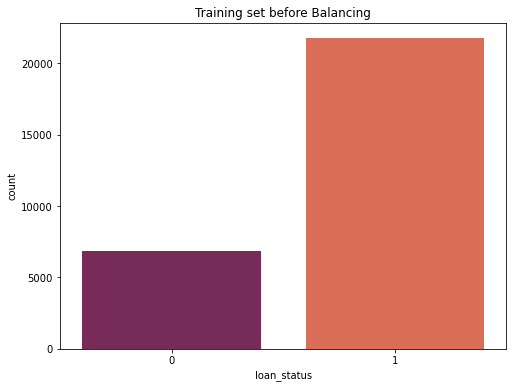

In [123]:
plt.figure(figsize=(8,6))
sns.countplot('loan_status',data=y_train,palette="rocket")
plt.title('Training set before Balancing')
plt.savefig('Unbalanced_1.png')

In [124]:
y['loan_status'].value_counts()

1    34289
0    10831
Name: loan_status, dtype: int64

Data should be balanced for good and more reliable Model. Here I have only `76%` samples labeled as `Good Loan`. `24%` of the total samples labeled as `Bad Loan`. So I have to balance that to remove biasness from the training dataset. I am using here a technique called `Synthetic Minority Oversampling Technique`. There are various other method to upsampled the minority class such as `upsampled with replacement`. I am using here `SMOTE` as according to author `SMOTE`provides more related minority class samples to learn from, thus allowing a learner to carve broader decision regions, leading to more coverage of the minority class.

With replication (samples with replacement), the results in a classification decision for the minority class can actually become smaller and more specific as the minority samples in the region are replicated. This is the opposite of the desired effect. The method of synthetic over-sampling works to cause the classifier to build larger decision regions that contain nearby minority class points. 



In [125]:
print(x_train.shape,y_train.shape)
print(y_train.value_counts())

(28587, 89) (28587, 1)
loan_status
1              21748
0               6839
dtype: int64


In [126]:
np.random.seed(40)
#label_up_sample={1:15182 ,1:14245,0:7920,3:982}
from imblearn.over_sampling import SMOTE

SMOTEE = SMOTE()

x_train, y_train = SMOTEE.fit_resample(x_train, y_train)

`SMOTE` will try to upsampled the minority to the majority. In my case it will bring all samples to 23847 examples because I am choosing default strategy. Smoteing does not generate the replicated sample but instead it will generate new samples bases on the values of the previous one

In [127]:
#### After Balancing
print(x_train.shape,y_train.shape)
print(y_train.value_counts())

(43496, 89) (43496, 1)
loan_status
1              21748
0              21748
dtype: int64


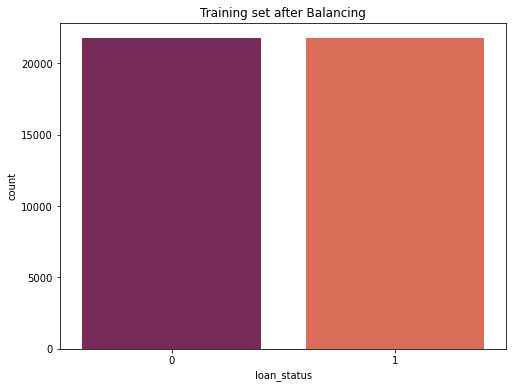

In [128]:
plt.figure(figsize=(8,6))
sns.countplot('loan_status',data=y_train,palette="rocket")
plt.title('Training set after Balancing')
plt.savefig('balanced_1.png')

###### Feature Selection

In [129]:
x_train.sample(3)

,home_ownership,loan_amnt,int_rate,installment,grade,annual_inc,verification_status,purpose,dti,delinq_2yrs,...,Issue_Year,last_payment_year,application_type_Individual,application_type_Joint App,term_36 months,term_60 months,hardship_flag_N,hardship_flag_Y,initial_list_status_f,initial_list_status_w
12765,2.0,16000,0.1408,372.96,1.0,77312.0,3.0,1.0,21.89,0,...,2017,2019,1,0,0,1,1,0,0,1
8757,1.0,28000,0.1199,929.87,4.0,120000.0,3.0,1.0,30.01,0,...,2017,2020,1,0,1,0,1,0,0,1
18047,2.0,33975,0.1505,809.16,1.0,138645.0,2.0,1.0,29.46,0,...,2017,2018,1,0,0,1,1,0,0,1


###### Correlation Based Feature Selection

In [130]:
len(num_cols)

77

In [131]:
corr_matrix=np.triu(x_train[num_cols].corr())
corr_matrix

array([[ 1.        ,  0.15372818,  0.94894544, ...,  0.01148685,
        -0.11623431, -0.03555246],
       [ 0.        ,  1.        ,  0.20403661, ..., -0.00603555,
        -0.1294546 , -0.16137339],
       [ 0.        ,  0.        ,  1.        , ...,  0.01902075,
        -0.05042786, -0.02227924],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.01083356,  0.02090631],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.1796715 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

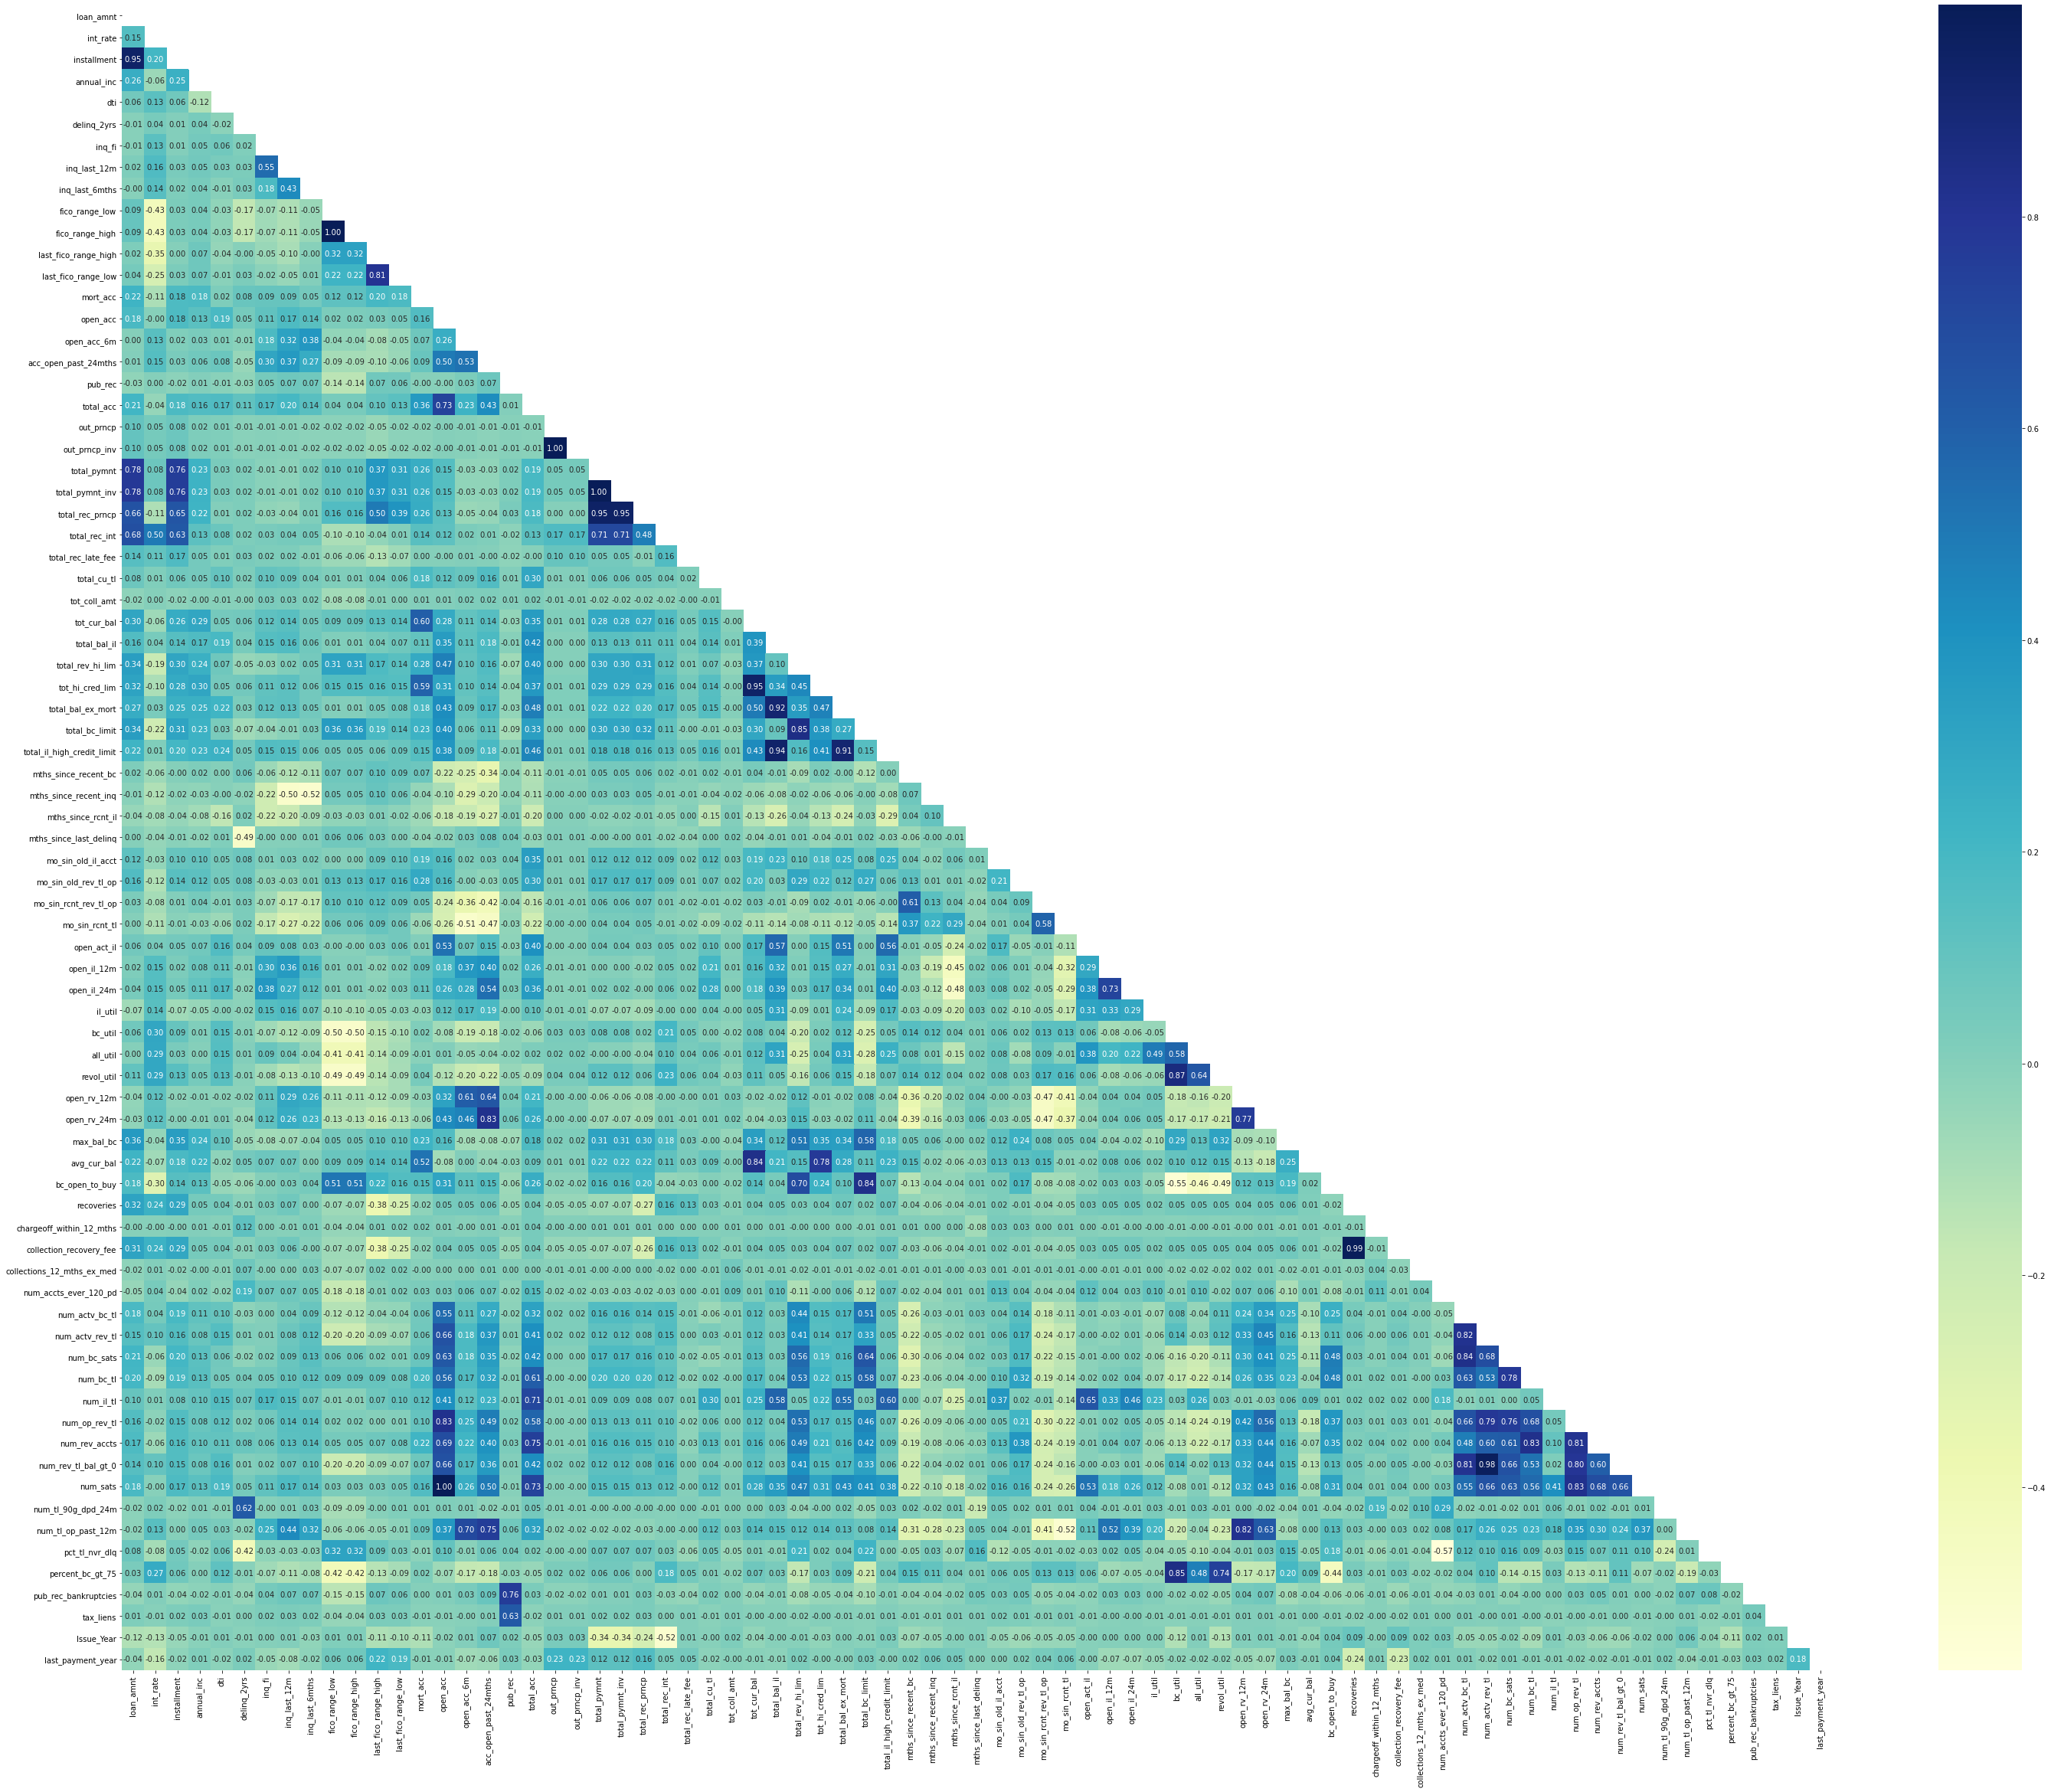

In [132]:
plt.figure(figsize=(50,40))
sns.heatmap(x_train[num_cols].corr(),mask=corr_matrix,annot=True,fmt='.2f',cmap='YlGnBu')
plt.savefig('Correlation.png')

In [133]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [135]:
corr_features = correlation(x_train[num_cols], 0.8)
len(set(corr_features))

23

In [136]:
corr_features=list(corr_features)
corr_features

['total_il_high_credit_limit',
 'num_rev_accts',
 'last_fico_range_low',
 'num_sats',
 'open_rv_24m',
 'fico_range_high',
 'collection_recovery_fee',
 'num_op_rev_tl',
 'num_actv_rev_tl',
 'num_tl_op_past_12m',
 'total_bal_ex_mort',
 'avg_cur_bal',
 'tot_hi_cred_lim',
 'num_bc_sats',
 'installment',
 'bc_open_to_buy',
 'revol_util',
 'total_rec_prncp',
 'total_bc_limit',
 'out_prncp_inv',
 'total_pymnt_inv',
 'percent_bc_gt_75',
 'num_rev_tl_bal_gt_0']

In [137]:
Correlation_removed=pd.DataFrame(data=corr_features,columns=['Correlated Features'])

In [138]:
Correlation_removed

,Correlated Features
0,total_il_high_credit_limit
1,num_rev_accts
2,last_fico_range_low
3,num_sats
4,open_rv_24m
5,fico_range_high
6,collection_recovery_fee
7,num_op_rev_tl
8,num_actv_rev_tl
9,num_tl_op_past_12m


In [139]:
x_train=x_train.drop(corr_features,axis=1)
x_train

,home_ownership,loan_amnt,int_rate,grade,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_fi,...,Issue_Year,last_payment_year,application_type_Individual,application_type_Joint App,term_36 months,term_60 months,hardship_flag_N,hardship_flag_Y,initial_list_status_f,initial_list_status_w
0,2.000000,18975,0.094400,4.000000,135000.000000,2.000000,3.000000,13.520000,0,0.000000,...,2017,2018,1,0,1,0,1,0,0,1
1,1.000000,6600,0.160200,1.000000,60000.000000,3.000000,7.000000,19.930000,0,1.000000,...,2017,2018,1,0,1,0,1,0,0,1
2,3.000000,16000,0.119900,4.000000,60000.000000,3.000000,2.000000,13.240000,0,1.000000,...,2017,2018,1,0,0,1,1,0,0,1
3,1.000000,19000,0.099300,4.000000,53500.000000,2.000000,3.000000,8.610000,0,0.000000,...,2017,2020,1,0,1,0,1,0,1,0
4,2.000000,24000,0.214500,2.000000,96000.000000,1.000000,3.000000,34.880000,0,0.000000,...,2017,2019,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43491,2.000000,20819,0.172782,2.000000,105190.114521,1.000000,1.096992,21.740308,0,0.000000,...,2017,2018,1,0,0,0,1,0,0,0
43492,1.000000,10452,0.298076,5.605085,23083.565080,2.842034,1.921017,19.539213,0,1.000000,...,2017,2018,0,0,0,0,1,0,0,0
43493,1.212821,23031,0.106919,3.787179,60532.052125,2.106410,3.425642,15.288923,0,0.212821,...,2017,2018,1,0,1,0,1,0,0,0
43494,2.044113,16433,0.129889,2.566170,45000.000000,3.000000,1.000000,18.437636,0,0.000000,...,2017,2019,1,0,1,0,1,0,0,0


In [140]:
x_train.to_csv('x_train_final.csv')

In [141]:
x_train.shape

(43496, 66)

In [142]:
y_train.shape

(43496, 1)

In [143]:
final_cols=x_train.columns
final_cols

Index(['home_ownership', 'loan_amnt', 'int_rate', 'grade', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_fi',
       'inq_last_12m', 'inq_last_6mths', 'fico_range_low',
       'last_fico_range_high', 'mort_acc', 'open_acc', 'open_acc_6m',
       'acc_open_past_24mths', 'pub_rec', 'total_acc', 'out_prncp',
       'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'total_cu_tl',
       'tot_coll_amt', 'tot_cur_bal', 'total_bal_il', 'total_rev_hi_lim',
       'mths_since_recent_bc', 'mths_since_recent_inq', 'mths_since_rcnt_il',
       'mths_since_last_delinq', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'il_util', 'bc_util', 'all_util', 'open_rv_12m',
       'max_bal_bc', 'recoveries', 'chargeoff_within_12_mths',
       'collections_12_mths_ex_med', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_bc_tl', 'num_il_tl', 'num_tl_90g_dpd_24m', '

In [144]:
77-23

54

In [145]:
54+12

66

 ###### Now i have to impute the missing values in test and validation set

In [146]:
x_test=x_test[final_cols]
x_valid=x_valid[final_cols]

In [147]:
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(43496, 66)
(9024, 66)
(7220, 66)


In [148]:
g=x_valid.isna().sum()
g[g>0]

dti                         13
inq_fi                     392
inq_last_12m               392
open_acc_6m                392
total_cu_tl                392
total_bal_il               392
mths_since_recent_bc        90
mths_since_recent_inq      749
mths_since_rcnt_il         582
mths_since_last_delinq    3727
mo_sin_old_il_acct         198
open_act_il                392
open_il_12m                392
open_il_24m                392
il_util                   1359
bc_util                     98
all_util                   393
open_rv_12m                392
max_bal_bc                 392
dtype: int64

In [149]:
for i in x_test.columns:
    if x_test[i].isna().sum()>0:
        x_test[i]=x_test[i].fillna(x_train[i].mean())

In [150]:
for i in x_valid.columns:
    if x_valid[i].isna().sum()>0:
        x_valid[i]=x_valid[i].fillna(x_train[i].mean())

In [151]:
x_valid.shape

(7220, 66)

In [152]:
x_valid.reset_index(inplace=True)

In [153]:
x_test.reset_index(inplace=True)

###### Normalizing the sets

I am Now `Normalizing Numerical Columns` of training validation and Test set.

In [154]:
transformed_cat_cols=['home_ownership', 'grade', 'verification_status', 'purpose','application_type_Joint App','term_60 months','hardship_flag_Y','initial_list_status_w','application_type_Individual','term_36 months','hardship_flag_N','initial_list_status_f']
len(transformed_cat_cols)

12

In [155]:
print(x_train.shape)

(43496, 66)


In [156]:
x_valid[transformed_cat_cols].head()

,home_ownership,grade,verification_status,purpose,application_type_Joint App,term_60 months,hardship_flag_Y,initial_list_status_w,application_type_Individual,term_36 months,hardship_flag_N,initial_list_status_f
0,1.0,1.0,3.0,1.0,0,0,0,1,1,1,1,0
1,2.0,4.0,2.0,8.0,0,0,0,0,1,1,1,1
2,2.0,5.0,3.0,3.0,0,0,0,1,1,1,1,0
3,2.0,4.0,2.0,3.0,0,0,0,0,1,1,1,1
4,1.0,3.0,2.0,1.0,0,0,0,1,1,1,1,0


##### x_train Normalization

In [157]:
len(transformed_cat_cols)

12

In [158]:
cols_for_normalization = x_train[x_train.columns[~x_train.columns.isin(transformed_cat_cols)]].columns
#valid_cols_for_normalization = x_valid[x_valid.columns[~x_valid.columns.isin(transformed_cat_cols)]].columns
#test_cols_for_normalization = x_test[x_test.columns[~x_test.columns.isin(transformed_cat_cols)]].columns

In [159]:
len(cols_for_normalization)

54

In [160]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l2')
x_train_norma_cols = pd.DataFrame(normalizer.fit_transform(x_train[cols_for_normalization]),columns=cols_for_normalization)
x_test_norma_cols = pd.DataFrame(normalizer.transform(x_test[cols_for_normalization]),columns=cols_for_normalization)
x_valid_norma_cols = pd.DataFrame(normalizer.transform(x_valid[cols_for_normalization]),columns=cols_for_normalization)

In [161]:
print(x_train_norma_cols.shape)
print(x_test_norma_cols.shape)
print(x_valid_norma_cols.shape)

(43496, 54)
(9024, 54)
(7220, 54)


In [162]:
x_valid_norma_cols.sample(3)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,last_fico_range_high,...,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,Issue_Year,last_payment_year
962,0.097398,1.172673e-06,0.636334,0.000117,0.0,0.000006,0.000026,0.000006,0.004318,0.003727,...,0.0,0.000052,0.000058,0.000019,0.0,0.000649,0.0,0.0,0.013097,0.013110
5895,0.230833,2.605523e-06,0.577082,0.000490,0.0,0.000014,0.000014,0.000000,0.009666,0.007993,...,0.0,0.000058,0.000058,0.000043,0.0,0.001443,0.0,0.0,0.029099,0.029128
2413,0.079703,4.550669e-07,0.265677,0.000063,0.0,0.000000,0.000008,0.000000,0.002847,0.002862,...,0.0,0.000008,0.000030,0.000011,0.0,0.000367,0.0,0.0,0.007655,0.007663


In [163]:
x_train_normalized=pd.concat([x_train_norma_cols,x_train[transformed_cat_cols]],axis=1)
x_valid_normalized=pd.concat([x_valid_norma_cols,x_valid[transformed_cat_cols]],axis=1)
x_test_normalized=pd.concat([x_test_norma_cols,x_test[transformed_cat_cols]],axis=1)

In [164]:
print(x_train_normalized.shape)
print(x_valid_normalized.shape)
print(x_test_normalized.shape)

(43496, 66)
(7220, 66)
(9024, 66)


###### Modles Selection

In [165]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [166]:
models={
    'Support_vector_machine':SVC(),
    'KN_Classifeir':KNeighborsClassifier(),
    'Naive_B':GaussianNB(),
    'Logistic_Regre':LogisticRegression(),
}

In [168]:
np.random.seed(40)
for name,model in models.items():
    model.fit(x_train_normalized,y_train)
    print(f"{name} accuracy on train set is: {model.score(x_train_normalized, y_train) * 100}%")
    print(f"{name} accuracy on test set is: {model.score(x_test_normalized, y_test) * 100}%")
    print('**************************')

Support_vector_machine accuracy on train set is: 84.754919992643%
Support_vector_machine accuracy on test set is: 86.61347517730496%
**************************
KN_Classifeir accuracy on train set is: 87.18732757035129%
KN_Classifeir accuracy on test set is: 75.25487588652481%
**************************
Naive_B accuracy on train set is: 91.62911532094905%
Naive_B accuracy on test set is: 92.6529255319149%
**************************
Logistic_Regre accuracy on train set is: 93.07522530807431%
Logistic_Regre accuracy on test set is: 93.572695035461%
**************************


Based on the performance of different models I am chosing `Logistic regression ` as my final model. In the next step I will generate different evaluation matrix, to check the performance of my model.

In [170]:
np.random.seed(40)
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train_normalized,y_train)

LogisticRegression()

In [173]:
y_test_baseline_preds=clf.predict(x_test_normalized)

In [174]:
print(y_test_baseline_preds[0:10])
print(y_test[0:10])

[1 0 1 1 1 1 1 1 1 1]
       loan_status
56945            1
21177            0
61332            1
68648            1
11871            1
58486            0
67840            1
33095            1
25767            1
72659            1


##### Base Line Model Evaluation

In [175]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score, roc_curve,plot_confusion_matrix,f1_score,recall_score

`Model Accuracy`

In [176]:
print(f"Logistic Regression Base line Accuracy on Test set: {clf.score(x_test_normalized, y_test) * 100:.2f}%")

Logistic Regression Base line Accuracy on Test set: 93.57%


`Confusion Matrix`

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving me an idea of where the model is getting confused.

In [177]:
confusion=confusion_matrix(y_test, y_test_baseline_preds)
confusion

array([[1589,  572],
       [   8, 6855]], dtype=int64)

In [180]:
def visualisation_conf_mat_by_seaborn(conf_mat):

    plt.figure(figsize=(4,4))
    sns.heatmap(conf_mat,
                annot=True,  
                cbar=False,
               fmt='.0f',)
    plt.title('Confusion Matrix Before Tunning Model (Test Set)')
    plt.xlabel('Predicted label')
    plt.ylabel('True label');
    plt.savefig('New_Confusion_matrix_1.png')


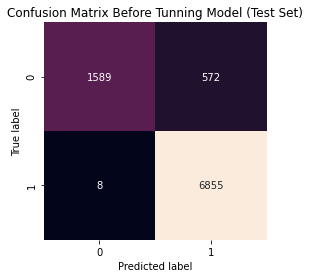

In [181]:
visualisation_conf_mat_by_seaborn(confusion)

In [182]:
classi=classification_report(y_test,y_test_baseline_preds)
print(classi)

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      2161
           1       0.92      1.00      0.96      6863

    accuracy                           0.94      9024
   macro avg       0.96      0.87      0.90      9024
weighted avg       0.94      0.94      0.93      9024



    Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
    Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
    F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
    Support - The number of samples each metric was calculated on.

###### Area Under Receiver Operating Characteristic (ROC) Curve

ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

I am going here with the default values of threshold of Logistic Regression which is `0.5` because in a club loan dataset it is more important to know both who willbe a good loaner and who will be a bad loner . So I am not changing the threshold value and shifting it to give more weight to either side

In [183]:
y_test_proba_1=clf.predict_proba(x_test_normalized)
y_test_proba_1[0:10]

array([[0.14519206, 0.85480794],
       [0.56550094, 0.43449906],
       [0.2309811 , 0.7690189 ],
       [0.29283421, 0.70716579],
       [0.24894646, 0.75105354],
       [0.31453143, 0.68546857],
       [0.16985527, 0.83014473],
       [0.01134242, 0.98865758],
       [0.13083546, 0.86916454],
       [0.26785358, 0.73214642]])

In [184]:
y_test_baseline_preds[0:10]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

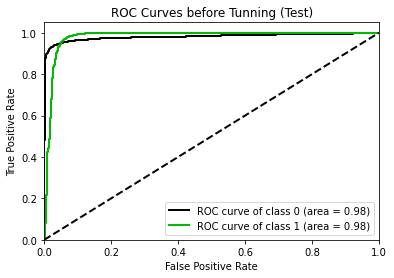

In [186]:
import scikitplot as skplt
from sklearn.metrics import plot_roc_curve
skplt.metrics.plot_roc_curve(y_test, y_test_proba_1,title='ROC Curves before Tunning (Test)',curves=( 'each_class'));
plt.savefig('roc_1_new.png')

###### Model Hyperparameters Tunning

Two of the main methods to improve baseline model performance and metrics are from a data perspective and a model perspective.

From a data perspective asks:

Could I collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
Could I improve my data? This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.

From a model perspective asks:

Is there a better model I could use? If I've started out with a simple model, could I use a more complex one? 

Could I improve the current model? If the model I am using performs well straight out of the box, can the hyperparameters be tuned to make it even better?

###### Thresholding Phenomena

In [187]:
### these are the different hyperparameter that I can tune on Logistic Regression
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Penalty: l1 or l2 which species the norm used in the penalization.

C: Inverse of regularization strength- smaller values of C specify stronger regularization.

In [188]:
grid={
    'C':[0.001,0.01,0.1,1,10,100,1000],
    'penalty':['l1','l2'],
    'solver':['liblinear','lbfgs','saga'],
    'max_iter':[100,150,200,300,500,1000]
}

In [189]:
from sklearn.model_selection import GridSearchCV
gs_clf=GridSearchCV(clf,param_grid=grid,n_jobs=1)
gs_clf.fit(x_train_normalized,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 150, 200, 300, 500, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']})

In [190]:
gs_clf.best_params_

{'C': 1000, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}

In [561]:
#y_valid_preds_after_tunning=gs_clf.predict(x_valid_normalized)

In [562]:
#y_valid_probability_after_tunning=gs_clf.predict_proba(x_valid_normalized)

In [191]:
#print(f"Logistic Regression Accuracy on Valid set after tunning is: {accuracy_score(y_valid,y_valid_preds_after_tunning) * 100:.2f}%")

In [883]:
#confusion_after_tunning=confusion_matrix(y_valid, y_valid_preds_after_tunning)
#visualisation_conf_mat_by_seaborn(confusion_after_tunning)

In [884]:
#Tuned_report_valid_set=classification_report(y_valid,y_valid_preds_after_tunning)
#print(Tuned_report_valid_set)

In [885]:
#skplt.metrics.plot_roc_curve(y_valid, y_valid_probability_after_tunning,title='ROC Curves on Tuned Models',curves=( 'each_class'));

###### Now I will use these best parameters and finaly check my accuarcy on the test set

In [886]:
tuned_model=LogisticRegression(penalty='l1',solver='liblinear',max_iter=500,C=1000)
tuned_model.fit(x_train_normalized,y_train)

LogisticRegression(C=1000, max_iter=500, penalty='l1', solver='liblinear')

In [887]:
y_preds_test=tuned_model.predict(x_test_normalized)

In [888]:
print(f"Logistic Regression Accuracy on Test set: {accuracy_score(y_test,y_preds_test) * 100:.2f}%")

Logistic Regression Accuracy on Test set: 99.89%


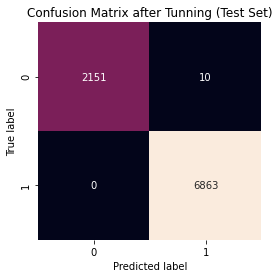

In [890]:
confusion_test_set=confusion_matrix(y_test, y_preds_test)
visualisation_conf_mat_by_seaborn(confusion_test_set)

In [891]:
classification_report_test=classification_report(y_test,y_preds_test)
print(classification_report_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2161
           1       1.00      1.00      1.00      6863

    accuracy                           1.00      9024
   macro avg       1.00      1.00      1.00      9024
weighted avg       1.00      1.00      1.00      9024



In [895]:
y_test_probability=tuned_model.predict_proba(x_test_normalized)

<Figure size 504x504 with 0 Axes>

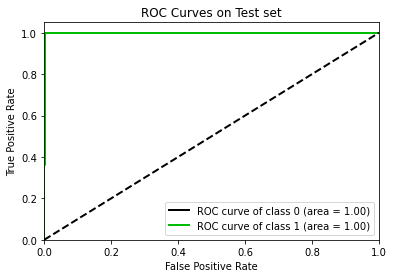

In [896]:
plt.figure(figsize=(7,7))
skplt.metrics.plot_roc_curve(y_test, y_test_probability,title='ROC Curves on Test set',curves=( 'each_class'));